In [1]:
import anndata as ad             # For reading/writing AnnData files
import matplotlib.pyplot as plt  # For plotting
import metacells as mc           # The Metacells package
import numpy as np               # For array/matrix operations
import pandas as pd              # For data frames
import os                        # For filesystem operations
import seaborn as sb             # For plotting
import scipy.sparse as sp        # For sparse matrices
import shutil                    # for filesystem operations
from math import hypot           # For plotting
from typing import * 

/nfs/research/icortes/ysong/anaconda3/envs/metacells094/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import scanpy as sc

In [3]:
adata = ad.read_h5ad("Great_Ape_MTG_public/marmoset_cellxgene_obs.h5ad")

In [4]:
adata

AnnData object with n_obs × n_vars = 75861 × 27126
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', '...1', 'Cluster', 'Neighborhood', 'Subclass', 'CrossSpeciesCluster', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'tissue_ontology_term_id', 'is_primary_data', 'donor_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'cell_id'
    var: 'name'

In [5]:
adata.obs['tissue']

bi005.temp.rxn1_CACTAAGAGAGCTTTC    middle temporal gyrus
bi005.temp.rxn1_GGATCTAGTCCATAGT    middle temporal gyrus
bi005.temp.rxn1_CCTCAGTTCCTTATGT    middle temporal gyrus
bi005.temp.rxn1_CTCAGGGCAGCTTCCT    middle temporal gyrus
bi005.temp.rxn1_TGTAAGCTCGGCCAAC    middle temporal gyrus
                                            ...          
bi007.temp.rxn2_GATTCTTTCTGACGCG    middle temporal gyrus
bi007.temp.rxn2_TATTTCGAGAGCAGTC    middle temporal gyrus
bi007.temp.rxn2_TGTGGCGTCGTGGCGT    middle temporal gyrus
bi007.temp.rxn2_TTCCGTGCATCGAGCC    middle temporal gyrus
bi007.temp.rxn2_TTCACGCTCTAGTTCT    middle temporal gyrus
Name: tissue, Length: 75861, dtype: category
Categories (1, object): ['middle temporal gyrus']

In [6]:
adata.X.max()

2801.0

In [7]:
adata.obs['assay'].value_counts()

assay
10x 3' v3    75861
Name: count, dtype: int64

In [8]:
adata_10x = adata[adata.obs.assay == '10x 3\' v3']

/nfs/research/icortes/ysong/anaconda3/envs/metacells094/lib/python3.11/site-packages/anndata/_core/anndata.py:1118: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [9]:
adata_10x.obs

orig.ident  nCount_RNA  nFeature_RNA  \
bi005.temp.rxn1_CACTAAGAGAGCTTTC  bi005.temp.rxn1     53342.0        9582.0   
bi005.temp.rxn1_GGATCTAGTCCATAGT  bi005.temp.rxn1     45212.0        8878.0   
bi005.temp.rxn1_CCTCAGTTCCTTATGT  bi005.temp.rxn1     44806.0        8157.0   
bi005.temp.rxn1_CTCAGGGCAGCTTCCT  bi005.temp.rxn1     41711.0        8580.0   
bi005.temp.rxn1_TGTAAGCTCGGCCAAC  bi005.temp.rxn1     37667.0        8030.0   
...                                           ...         ...           ...   
bi007.temp.rxn2_GATTCTTTCTGACGCG  bi007.temp.rxn2      3440.0        1874.0   
bi007.temp.rxn2_TATTTCGAGAGCAGTC  bi007.temp.rxn2      3413.0        1753.0   
bi007.temp.rxn2_TGTGGCGTCGTGGCGT  bi007.temp.rxn2      3093.0        1746.0   
bi007.temp.rxn2_TTCCGTGCATCGAGCC  bi007.temp.rxn2      2346.0        1425.0   
bi007.temp.rxn2_TTCACGCTCTAGTTCT  bi007.temp.rxn2      1615.0         999.0   

                                                              ...1  \
bi005.temp.rxn1_CACTAAGAGAGCTTTC  bi005.temp.rxn1_CACTAAGAGAGCTTTC   
bi005.temp.rxn1_GGATCTAGTCCATAGT  bi005.temp.rxn1_GGATCTAGTCCATAGT   
bi005.temp.rxn1_CCTCAGTTCCTTATGT  bi005.temp.rxn1_CCTCAGTTCCTTATGT   
bi005.temp.rxn1_CTCAGGGCAGCTTCCT  bi005.temp.rxn1_CTCAGGGCAGCTTCCT   
bi005.temp.rxn1_TGTAAGCTCGGCCAAC  bi005.temp.rxn1_TGTAAGCTCGGCCAAC   
...                                                            ...   
bi007.temp.rxn2_GATTCTTTCTGACGCG  bi007.temp.rxn2_GATTCTTTCTGACGCG   
bi007.temp.rxn2_TATTTCGAGAGCAGTC  bi007.temp.rxn2_TATTTCGAGAGCAGTC   
bi007.temp.rxn2_TGTGGCGTCGTGGCGT  bi007.temp.rxn2_TGTGGCGTCGTGGCGT   
bi007.temp.rxn2_TTCCGTGCATCGAGCC  bi007.temp.rxn2_TTCCGTGCATCGAGCC   
bi007.temp.rxn2_TTCACGCTCTAGTTCT  bi007.temp.rxn2_TTCACGCTCTAGTTCT   

                                       Cluster Neighborhood    Subclass  \
bi005.temp.rxn1_CACTAAGAGAGCTTTC        Endo_2         glia        Endo   
bi005.temp.rxn1_GGATCTAGTCCATAGT       Astro_3         glia       Astro   
bi005.temp.rxn1_CCTCAGTTCCTTATGT       Astro_3         glia       Astro   
bi005.temp.rxn1_CTCAGGGCAGCTTCCT       Astro_3         glia       Astro   
bi005.temp.rxn1_TGTAAGCTCGGCCAAC        Endo_2         glia        Endo   
...                                        ...          ...         ...   
bi007.temp.rxn2_GATTCTTTCTGACGCG       L5 IT_3     it_types       L5 IT   
bi007.temp.rxn2_TATTTCGAGAGCAGTC  L6 IT Car3_2     it_types  L6 IT Car3   
bi007.temp.rxn2_TGTGGCGTCGTGGCGT     L2/3 IT_1     it_types     L2/3 IT   
bi007.temp.rxn2_TTCCGTGCATCGAGCC     L2/3 IT_4     it_types     L2/3 IT   
bi007.temp.rxn2_TTCACGCTCTAGTTCT  L6 IT Car3_2     it_types  L6 IT Car3   

                                 CrossSpeciesCluster assay_ontology_term_id  \
bi005.temp.rxn1_CACTAAGAGAGCTTTC              Endo_1            EFO:0009922   
bi005.temp.rxn1_GGATCTAGTCCATAGT             Astro_1            EFO:0009922   
bi005.temp.rxn1_CCTCAGTTCCTTATGT             Astro_1            EFO:0009922   
bi005.temp.rxn1_CTCAGGGCAGCTTCCT             Astro_1            EFO:0009922   
bi005.temp.rxn1_TGTAAGCTCGGCCAAC              Endo_1            EFO:0009922   
...                                              ...                    ...   
bi007.temp.rxn2_GATTCTTTCTGACGCG             L5 IT_1            EFO:0009922   
bi007.temp.rxn2_TATTTCGAGAGCAGTC        L6 IT Car3_2            EFO:0009922   
bi007.temp.rxn2_TGTGGCGTCGTGGCGT           L2/3 IT_3            EFO:0009922   
bi007.temp.rxn2_TTCCGTGCATCGAGCC           L2/3 IT_1            EFO:0009922   
bi007.temp.rxn2_TTCACGCTCTAGTTCT        L6 IT Car3_2            EFO:0009922   

                                 cell_type_ontology_term_id  ... donor_id  \
bi005.temp.rxn1_CACTAAGAGAGCTTTC                 CL:1001602  ...    bi005   
bi005.temp.rxn1_GGATCTAGTCCATAGT                 CL:0002605  ...    bi005   
bi005.temp.rxn1_CCTCAGTTCCTTATGT                 CL:0002605  ...    bi005   
bi005.temp.rxn1_CTCAGGGCAGCTTCCT                 CL:0002605  ...    bi005   
bi005.temp.rxn

In [10]:
full = adata_10x
mc.ut.top_level(full)
mc.ut.set_name(full, "marmoset_mtg_full")
print(f"Full: {full.n_obs} cells, {full.n_vars} genes")

/nfs/research/icortes/ysong/anaconda3/envs/metacells094/lib/python3.11/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/nfs/research/icortes/ysong/anaconda3/envs/metacells094/lib/python3.11/contextlib.py:144: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  next(self.gen)


Full: 75861 cells, 27126 genes


In [11]:
PROPERLY_SAMPLED_MIN_CELL_TOTAL = 200
PROPERLY_SAMPLED_MAX_CELL_TOTAL = 200000

/nfs/research/icortes/ysong/anaconda3/envs/metacells094/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/nfs/research/icortes/ysong/anaconda3/envs/metacells094/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


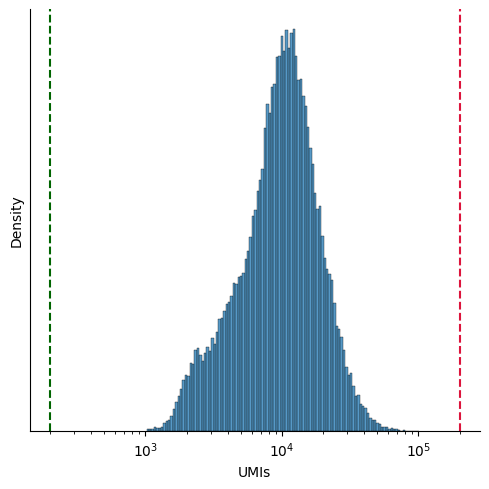

In [12]:
total_umis_per_cell = mc.ut.get_o_numpy(full, "__x__", sum=True)
plot = sb.displot(total_umis_per_cell, log_scale=(10, None))
plot.set(xlabel="UMIs", ylabel="Density", yticks=[])

plot.refline(x=PROPERLY_SAMPLED_MIN_CELL_TOTAL, color="darkgreen")
plot.refline(x=PROPERLY_SAMPLED_MAX_CELL_TOTAL, color="crimson")

In [13]:
## since the data is filtered by cellxgene and the author I do not exclude any cell types here

In [14]:
too_small_cells_count = np.sum(total_umis_per_cell < PROPERLY_SAMPLED_MIN_CELL_TOTAL)
too_large_cells_count = np.sum(total_umis_per_cell > PROPERLY_SAMPLED_MAX_CELL_TOTAL)

total_umis_per_cell = mc.ut.get_o_numpy(full, name="__x__", sum=True)
too_small_cells_percent = 100.0 * too_small_cells_count / full.n_obs
too_large_cells_percent = 100.0 * too_large_cells_count / full.n_vars

print(
    f"Will exclude {too_small_cells_count} ({too_small_cells_percent:.2f}%%) cells"
    f" with less than {PROPERLY_SAMPLED_MIN_CELL_TOTAL} UMIs"
)
print(
    f"Will exclude {too_large_cells_count} ({too_large_cells_percent:.2f}%%) cells"
    f" with more than {PROPERLY_SAMPLED_MAX_CELL_TOTAL} UMIs"
)

Will exclude 0 (0.00%%) cells with less than 200 UMIs
Will exclude 0 (0.00%%) cells with more than 200000 UMIs


In [15]:
EXCLUDED_GENE_NAMES = ["XIST", "MALAT1"]  # Sex-specific genes.
EXCLUDED_GENE_PATTERNS = ["MT-.*"]  

In [16]:
full.var

name
A1BG        A1BG
A1CF        A1CF
A2M          A2M
A2ML1      A2ML1
A3GALT2  A3GALT2
...          ...
ZYG11A    ZYG11A
ZYG11B    ZYG11B
ZYX          ZYX
ZZEF1      ZZEF1
ZZZ3        ZZZ3

[27126 rows x 1 columns]

In [17]:
full.var

name
A1BG        A1BG
A1CF        A1CF
A2M          A2M
A2ML1      A2ML1
A3GALT2  A3GALT2
...          ...
ZYG11A    ZYG11A
ZYG11B    ZYG11B
ZYX          ZYX
ZZEF1      ZZEF1
ZZZ3        ZZZ3

[27126 rows x 1 columns]

In [18]:
mc.pl.exclude_genes(
    full,
    excluded_gene_names=EXCLUDED_GENE_NAMES, 
    excluded_gene_patterns=EXCLUDED_GENE_PATTERNS,
    properly_sampled_min_gene_total=1, ##get genes with at least one count,however still removed quite a bit of genes, the default is one and Yuyao checked in raw data
    random_seed=123456,
)

/nfs/research/icortes/ysong/anaconda3/envs/metacells094/lib/python3.11/site-packages/anndata/_core/anndata.py:1118: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/nfs/research/icortes/ysong/anaconda3/envs/metacells094/lib/python3.11/site-packages/anndata/_core/anndata.py:1118: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
set marmoset_mtg_full.var[bursty_lonely_gene]: 0 true (0%) out of 27126 bools
set marmoset_mtg_full.var[properly_sampled_gene]: 27124 true (99.99%) out of 27126 bools
set marmoset_mtg_full.var[excluded_gene]: 2 true (0.007373%) out of 27126 bools


In [19]:
full.var

name  bursty_lonely_gene  properly_sampled_gene  excluded_gene
A1BG        A1BG               False                   True          False
A1CF        A1CF               False                   True          False
A2M          A2M               False                   True          False
A2ML1      A2ML1               False                   True          False
A3GALT2  A3GALT2               False                   True          False
...          ...                 ...                    ...            ...
ZYG11A    ZYG11A               False                   True          False
ZYG11B    ZYG11B               False                   True          False
ZYX          ZYX               False                   True          False
ZZEF1      ZZEF1               False                   True          False
ZZZ3        ZZZ3               False                   True          False

[27126 rows x 4 columns]

In [20]:
mc.tl.compute_excluded_gene_umis(full)

set marmoset_mtg_full.obs[excluded_umis]: 75861 float32s


In [21]:
PROPERLY_SAMPLED_MAX_EXCLUDED_GENES_FRACTION = 0.30


/nfs/research/icortes/ysong/anaconda3/envs/metacells094/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/nfs/research/icortes/ysong/anaconda3/envs/metacells094/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Will exclude 0 (0.00%) cells with more than 30.00% excluded gene UMIs


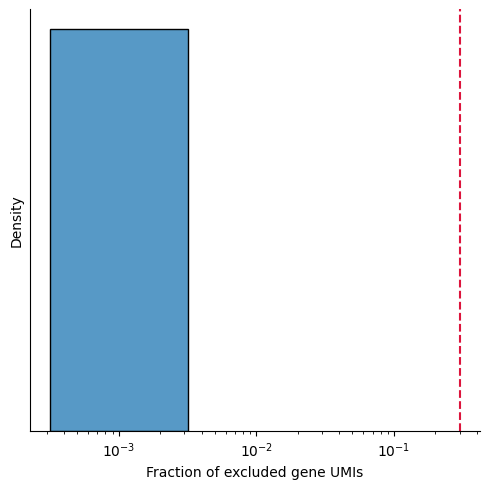

In [22]:
excluded_umis_fraction_regularization = 1e-3  # Avoid 0 values in log scale plot.
excluded_umis_per_cell = mc.ut.get_o_numpy(full, "excluded_umis")
excluded_umis_fraction_per_cell = excluded_umis_per_cell / total_umis_per_cell

excluded_umis_fraction_per_cell += excluded_umis_fraction_regularization
plot = sb.displot(excluded_umis_fraction_per_cell, log_scale=(10, None))
excluded_umis_fraction_per_cell -= excluded_umis_fraction_regularization

plot.set(xlabel="Fraction of excluded gene UMIs", ylabel="Density", yticks=[])
plot.refline(x=PROPERLY_SAMPLED_MAX_EXCLUDED_GENES_FRACTION, color="crimson")

too_excluded_cells_count = np.sum(
    excluded_umis_fraction_per_cell > PROPERLY_SAMPLED_MAX_EXCLUDED_GENES_FRACTION
)
too_excluded_cells_fraction = too_excluded_cells_count / len(total_umis_per_cell)

print(
    f"Will exclude {too_excluded_cells_count} ({100 * too_excluded_cells_fraction:.2f}%) cells"
    f" with more than {100 * PROPERLY_SAMPLED_MAX_EXCLUDED_GENES_FRACTION:.2f}% excluded gene UMIs"
)

In [23]:
## again do not exclude any cells

In [24]:
mc.pl.exclude_cells(
    full,
    properly_sampled_min_cell_total=PROPERLY_SAMPLED_MIN_CELL_TOTAL,
    properly_sampled_max_cell_total=PROPERLY_SAMPLED_MAX_CELL_TOTAL,
    properly_sampled_max_excluded_genes_fraction=PROPERLY_SAMPLED_MAX_EXCLUDED_GENES_FRACTION,
)

set marmoset_mtg_full.obs[properly_sampled_cell]: 75861 true (100%) out of 75861 bools
set marmoset_mtg_full.obs[excluded_cell]: 0 true (0%) out of 75861 bools


In [25]:
full.var

name  bursty_lonely_gene  properly_sampled_gene  excluded_gene
A1BG        A1BG               False                   True          False
A1CF        A1CF               False                   True          False
A2M          A2M               False                   True          False
A2ML1      A2ML1               False                   True          False
A3GALT2  A3GALT2               False                   True          False
...          ...                 ...                    ...            ...
ZYG11A    ZYG11A               False                   True          False
ZYG11B    ZYG11B               False                   True          False
ZYX          ZYX               False                   True          False
ZZEF1      ZZEF1               False                   True          False
ZZZ3        ZZZ3               False                   True          False

[27126 rows x 4 columns]

In [26]:
clean = mc.pl.extract_clean_data(full, name="marmoset_mtg_clean")
mc.ut.top_level(clean)
print(f"Clean: {clean.n_obs} cells, {clean.n_vars} genes")

/nfs/research/icortes/ysong/anaconda3/envs/metacells094/lib/python3.11/site-packages/anndata/_core/anndata.py:1118: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
set marmoset_mtg_clean.obs[full_cell_index]: 75861 int32s
set marmoset_mtg_clean.var[full_gene_index]: 27124 int32s


Clean: 75861 cells, 27124 genes


In [27]:
full.write_h5ad("marmoset_full.h5ad")

In [28]:
clean.write_h5ad("marmoset_clean.h5ad")

In [29]:
BASE_LATERAL_GENE_NAMES = [
    "AURKA", "MCM3", "MCM4", "MCM7", "MKI67", "PCNA", "RRM2", "SMC4", "TPX2",  # Cell-cycle
    "FOS", "HSP90AB1", "TXN",                                                  # Stress
]
BASE_LATERAL_GENE_PATTERNS = ["RP[LS].*"]  # Ribosomal

In [30]:
cells = clean
clean = None  # Allow it to be gc-ed
mc.ut.set_name(cells, "marmoset_mtg_iteration1")
print(f"Iteration 1: {cells.n_obs} cells, {cells.n_vars} genes")

Iteration 1: 75861 cells, 27124 genes


In [31]:
# We'll reuse this through the iterations.
# It is just a thin wrapper for mark_lateral_genes,
# and optionally also shows the results.
def update_lateral_genes(
    *,
    names: List[str] = [],
    patterns: List[str] = [],
    op: str = "set",
    show: bool = True
) -> None:
    mc.pl.mark_lateral_genes(
        cells,
        lateral_gene_names=names,
        lateral_gene_patterns=patterns,
        op=op
    )

    if not show:
        return
    
    lateral_genes_mask = mc.ut.get_v_numpy(cells, "lateral_gene")
    lateral_gene_names = set(cells.var_names[lateral_genes_mask])
    
    print(sorted([
        name for name in lateral_gene_names
        if not name.startswith("RPL") and not name.startswith("RPS")
    ]))

    print(f"""and {len([
        name for name in lateral_gene_names if name.startswith("RPL") or name.startswith("RPS")
    ])} RP[LS].* genes""")

update_lateral_genes(names=BASE_LATERAL_GENE_NAMES, patterns=BASE_LATERAL_GENE_PATTERNS)

set marmoset_mtg_iteration1.var[lateral_gene]: 101 true (0.3724%) out of 27124 bools


['AURKA', 'FOS', 'HSP90AB1', 'MCM3', 'MCM4', 'MCM7', 'MKI67', 'PCNA', 'RRM2', 'SMC4', 'TPX2', 'TXN']
and 89 RP[LS].* genes


In [32]:
mc.pl.relate_to_lateral_genes(cells, random_seed=123456)

/nfs/research/icortes/ysong/anaconda3/envs/metacells094/lib/python3.11/site-packages/anndata/_core/anndata.py:1118: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
set marmoset_mtg_iteration1.var[lateral_genes_module]: 19236 outliers (70.92%) and 7888 grouped (29.08%) out of 27124 int32 elements with 197 groups with mean size 40.04
set marmoset_mtg_iteration1.varp[lateral_genes_similarity]: csr_matrix 27124 X 27124 float32s (62220544 > 0, 8.457%)


In [33]:
base_lateral_genes_mask = mc.ut.get_v_numpy(cells, "lateral_gene")
base_lateral_gene_names = set(cells.var_names[base_lateral_genes_mask])

module_per_gene = mc.ut.get_v_series(cells, "lateral_genes_module")
base_lateral_gene_modules = np.unique(module_per_gene.values[base_lateral_genes_mask])
base_lateral_gene_modules = set(base_lateral_gene_modules[base_lateral_gene_modules >= 0])

genes_per_module = np.unique(module_per_gene.values, return_counts=True)[1][1:]
similarity_of_modules = mc.ut.get_vv_proper(cells, "lateral_genes_similarity")
similarity_of_modules = mc.ut.sum_groups(similarity_of_modules, module_per_gene.values, per="row")[0]
similarity_of_modules = mc.ut.to_layout(similarity_of_modules, layout="column_major")
similarity_of_modules = \
    mc.ut.sum_groups(similarity_of_modules, module_per_gene.values, per="column")[0]
similarity_of_modules /= genes_per_module[:, np.newaxis] * genes_per_module[np.newaxis, :]

module_names = [
    f"(*) {gene_module}" if gene_module in base_lateral_gene_modules else str(gene_module)
    for gene_module in range(np.max(module_per_gene.values) + 1)
]
similarity_of_modules = pd.DataFrame(similarity_of_modules, index=module_names, columns=module_names)

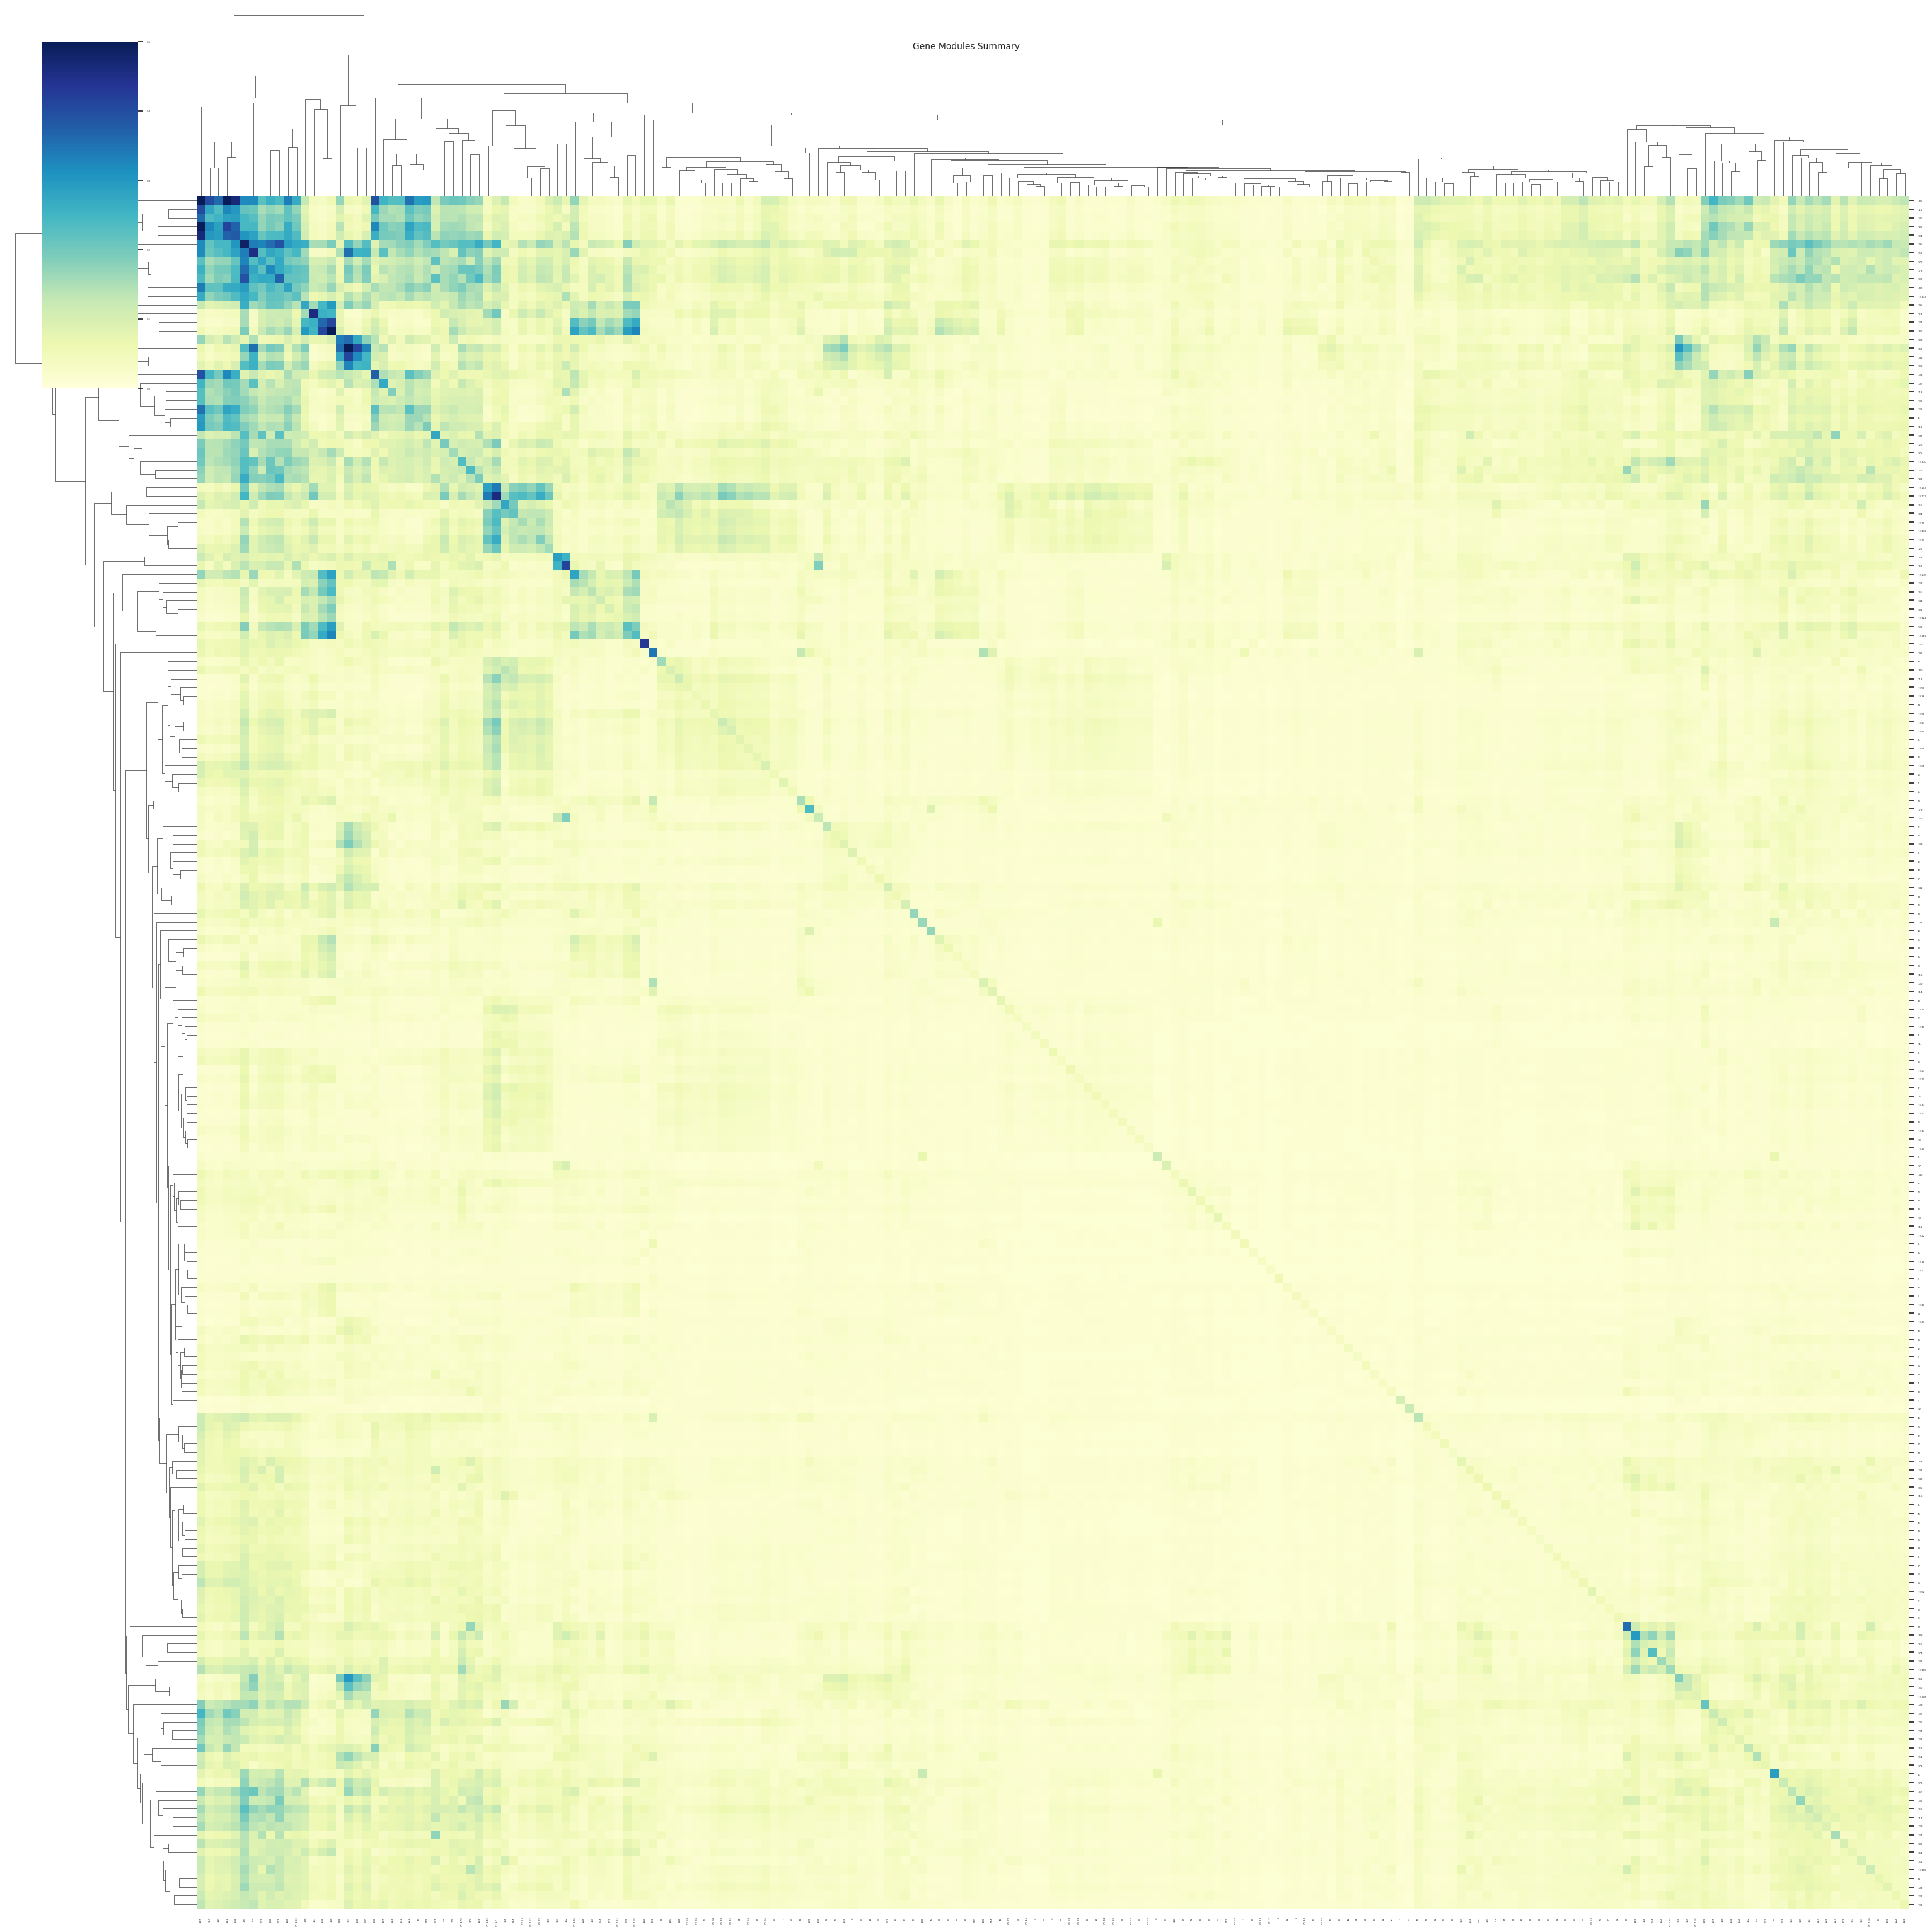

In [34]:
size = similarity_of_modules.shape[0]
if size > 50:
    sb.set(font_scale=50 / size)
size = size * 0.15 + 1
cm = sb.clustermap(
    similarity_of_modules,
    figsize=(size, size),
    vmin=0, vmax=0.5,
    xticklabels=True, yticklabels=True,
    dendrogram_ratio=0.1,
    cmap="YlGnBu",
)
cm.fig.suptitle("Gene Modules Summary", fontsize=10)

plt.show()

In [36]:
base_lateral_gene_modules

array([  2,  10,  14,  15,  18,  20,  21,  22,  23,  36,  43,  44,  45,
        47,  50,  52,  56,  61,  70,  71,  75,  79,  98, 112, 124, 136,
       143, 158, 160, 169, 170, 177, 185, 193], dtype=int32)

<Figure size 295x295 with 0 Axes>

<Figure size 265x265 with 0 Axes>

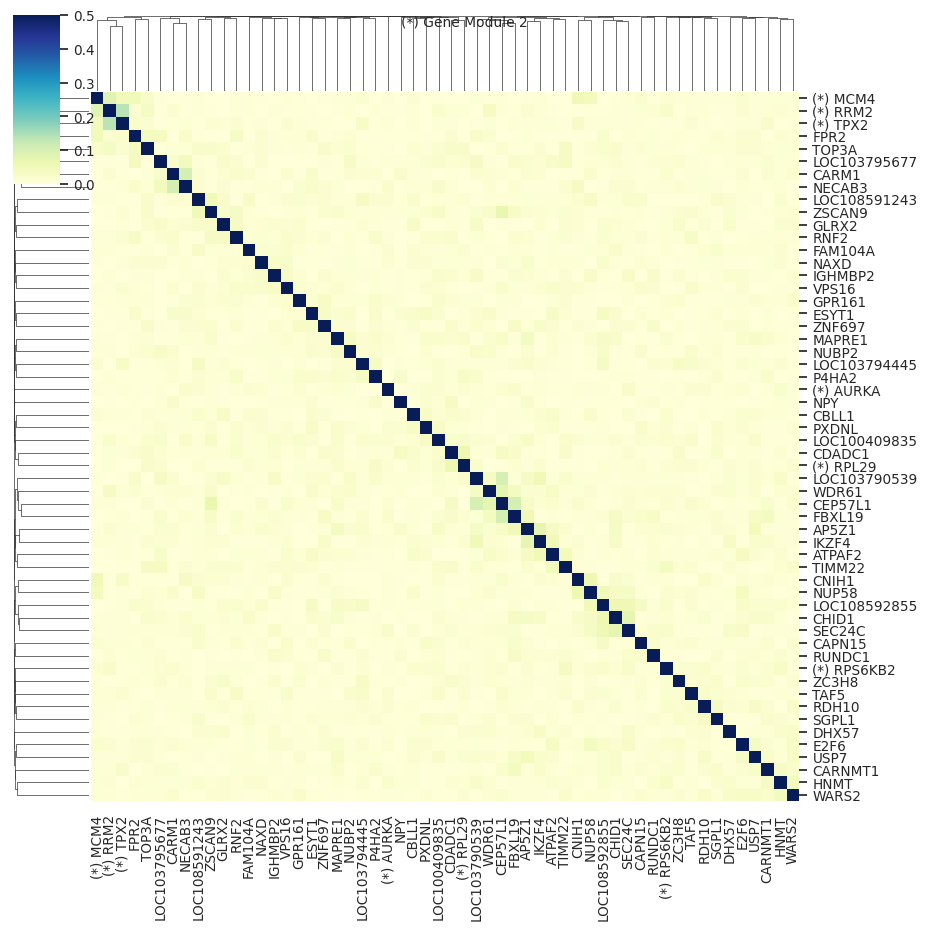

<Figure size 490x490 with 0 Axes>

<Figure size 700x700 with 0 Axes>

<Figure size 700x700 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 415x415 with 0 Axes>

<Figure size 340x340 with 0 Axes>

<Figure size 520x520 with 0 Axes>

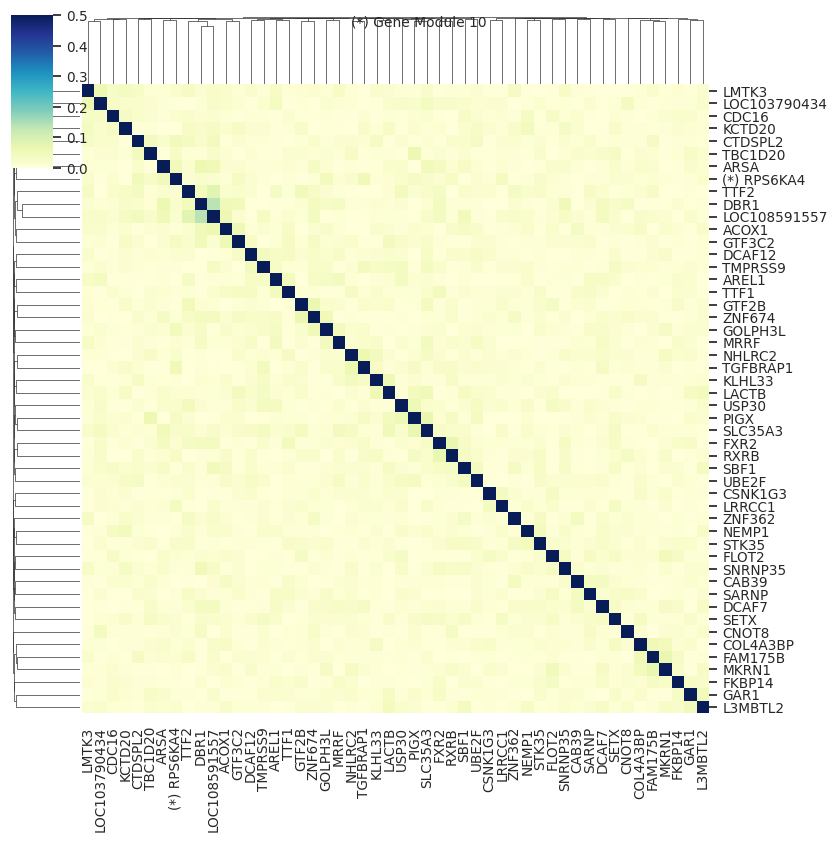

<Figure size 655x655 with 0 Axes>

<Figure size 280x280 with 0 Axes>

<Figure size 355x355 with 0 Axes>

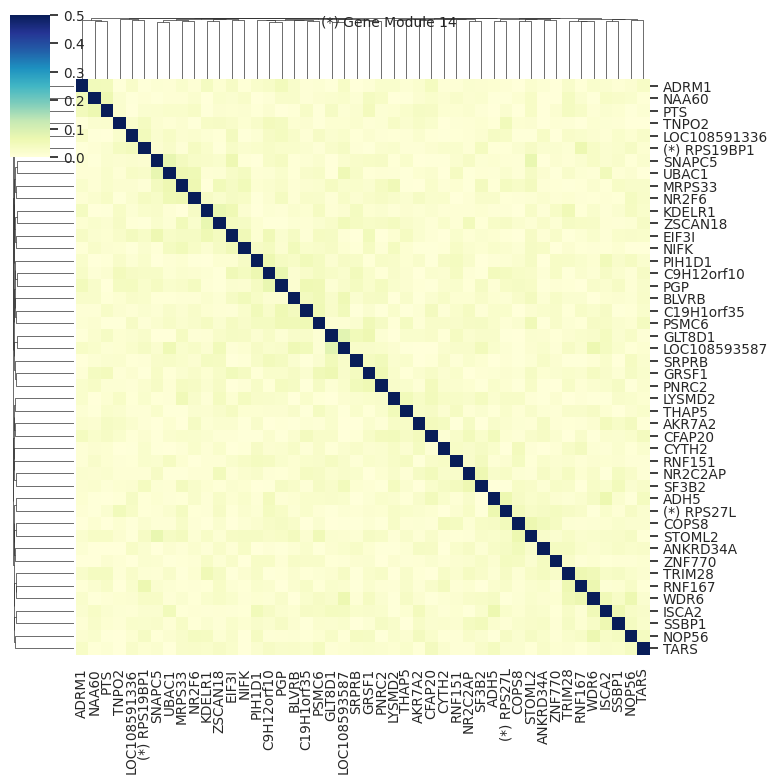

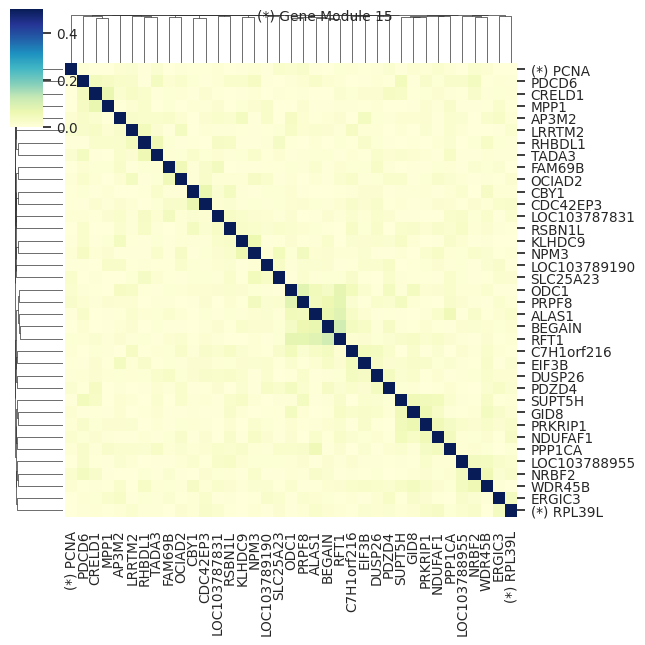

<Figure size 790x790 with 0 Axes>

<Figure size 340x340 with 0 Axes>

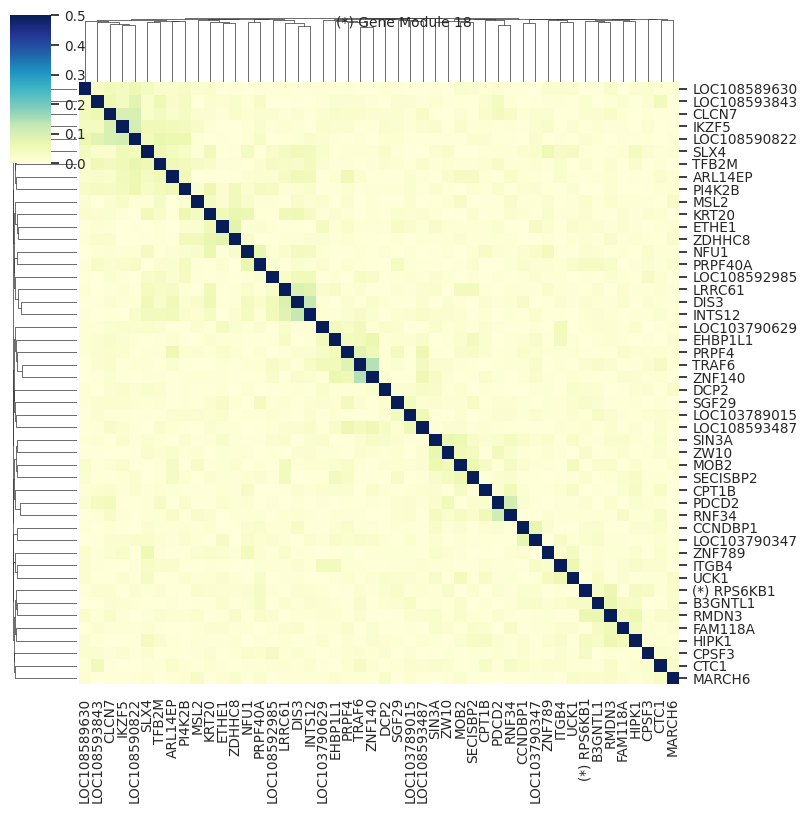

<Figure size 610x610 with 0 Axes>

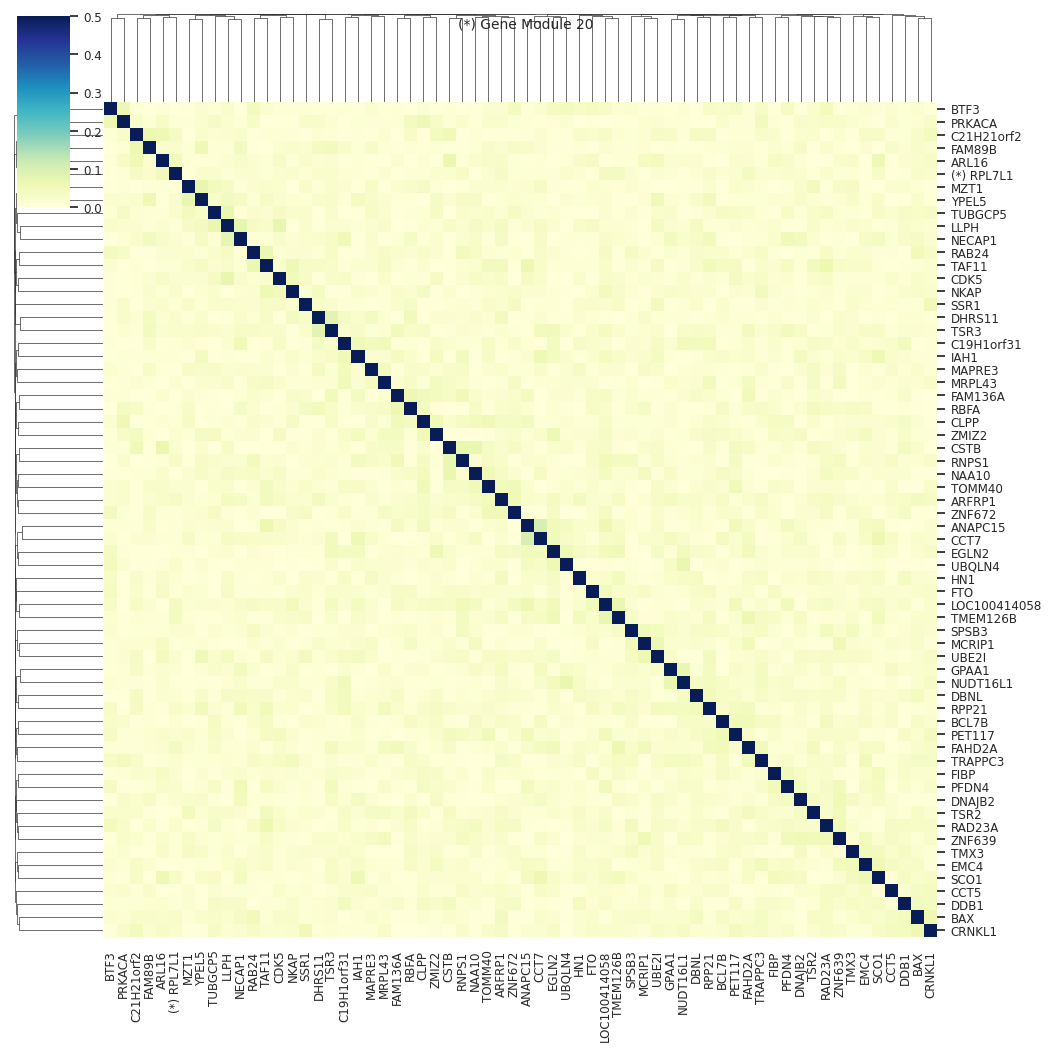

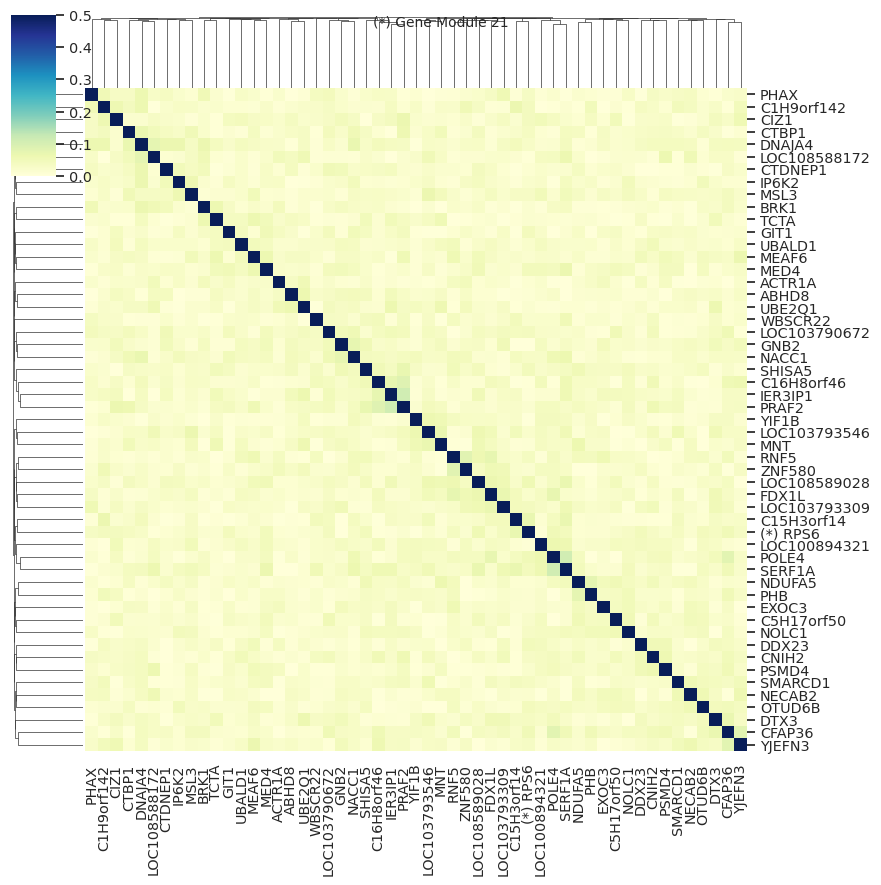

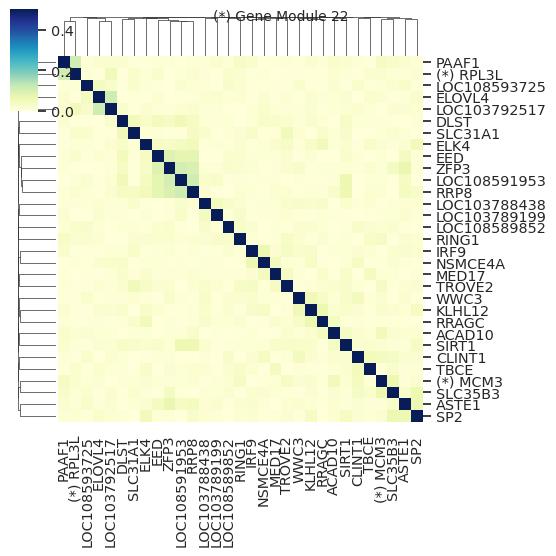

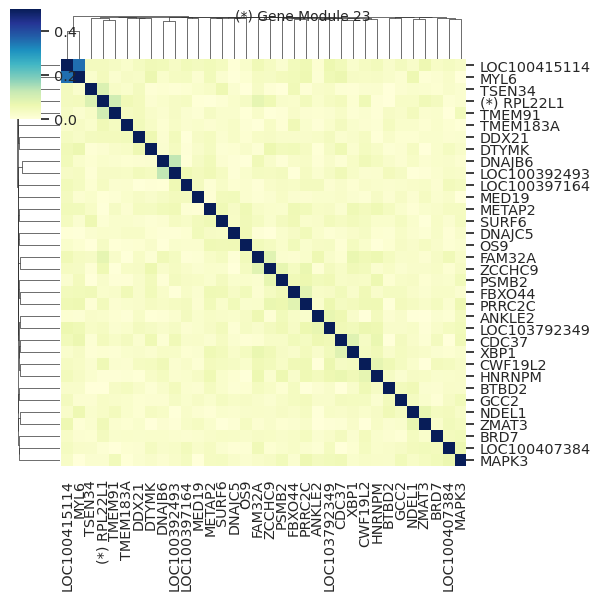

<Figure size 625x625 with 0 Axes>

<Figure size 835x835 with 0 Axes>

<Figure size 865x865 with 0 Axes>

<Figure size 520x520 with 0 Axes>

<Figure size 775x775 with 0 Axes>

<Figure size 760x760 with 0 Axes>

<Figure size 220x220 with 0 Axes>

<Figure size 550x550 with 0 Axes>

<Figure size 685x685 with 0 Axes>

<Figure size 220x220 with 0 Axes>

<Figure size 970x970 with 0 Axes>

<Figure size 640x640 with 0 Axes>

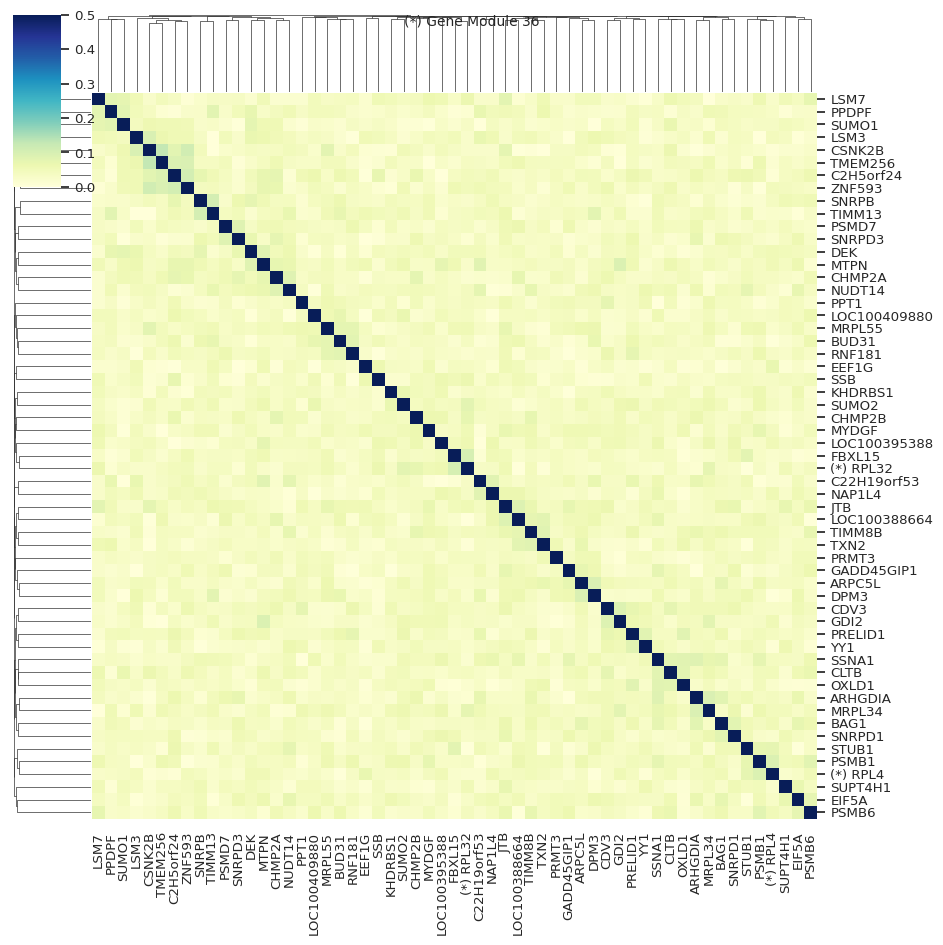

<Figure size 940x940 with 0 Axes>

<Figure size 880x880 with 0 Axes>

<Figure size 895x895 with 0 Axes>

<Figure size 355x355 with 0 Axes>

<Figure size 835x835 with 0 Axes>

<Figure size 655x655 with 0 Axes>

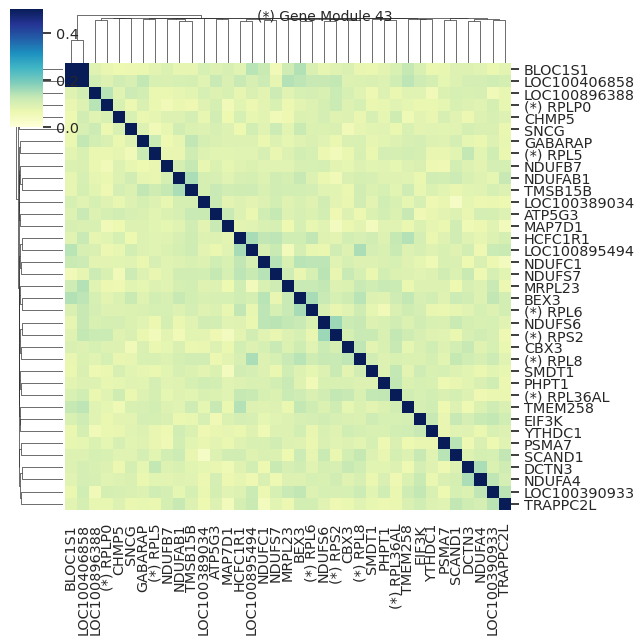

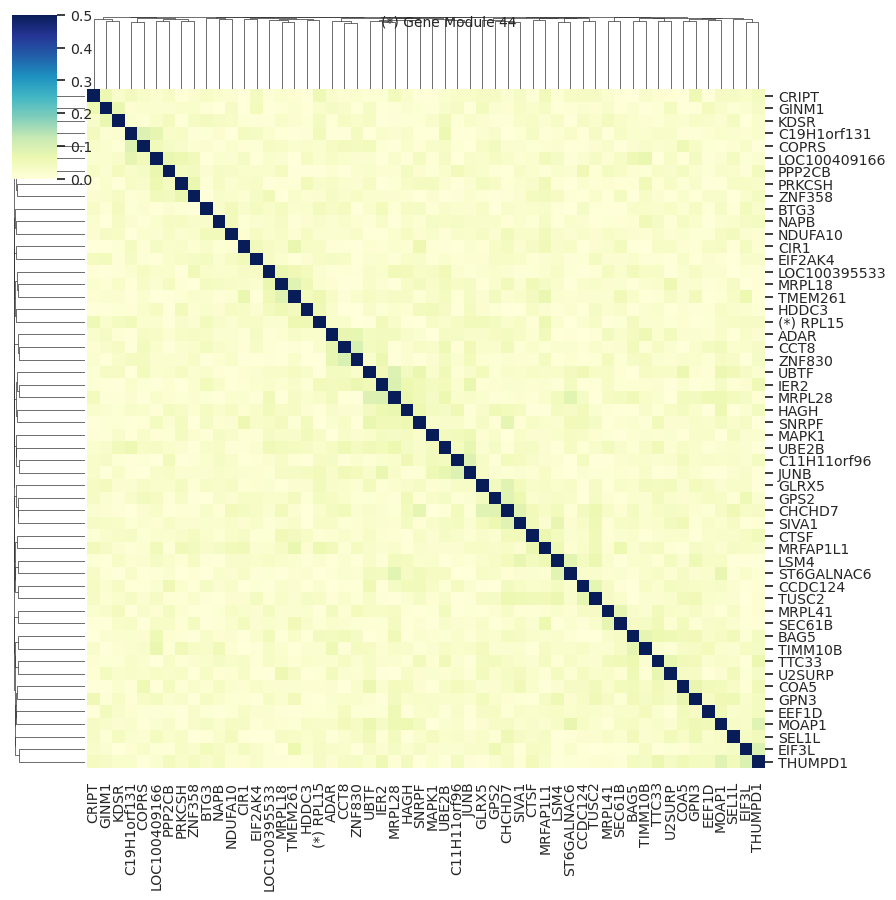

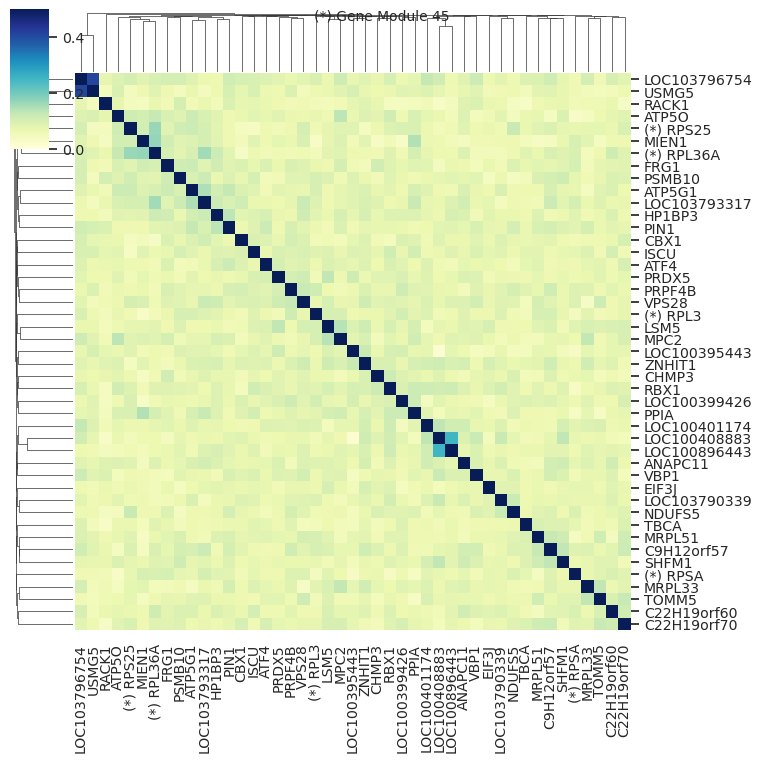

<Figure size 280x280 with 0 Axes>

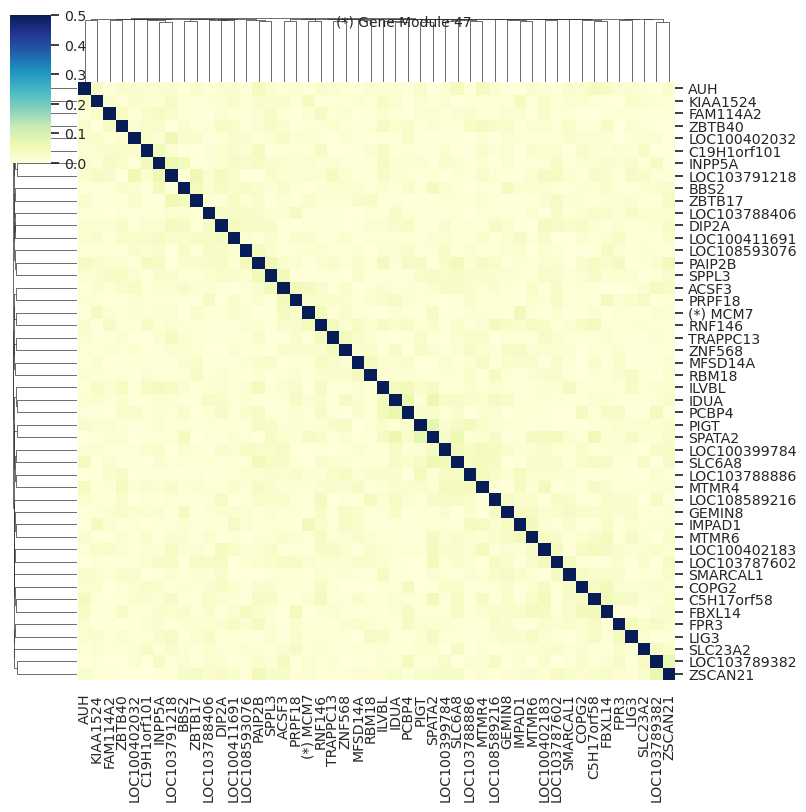

<Figure size 700x700 with 0 Axes>

<Figure size 880x880 with 0 Axes>

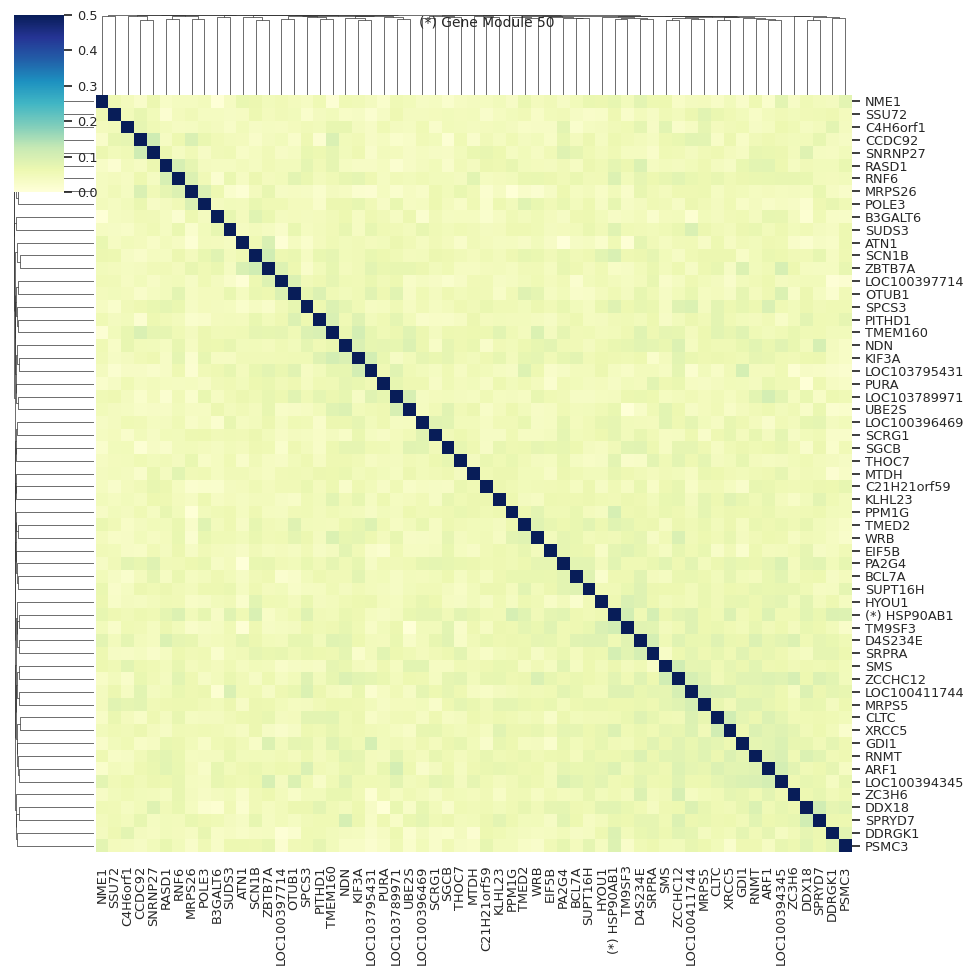

<Figure size 850x850 with 0 Axes>

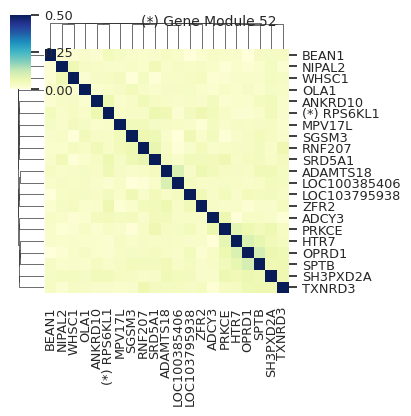

<Figure size 790x790 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 865x865 with 0 Axes>

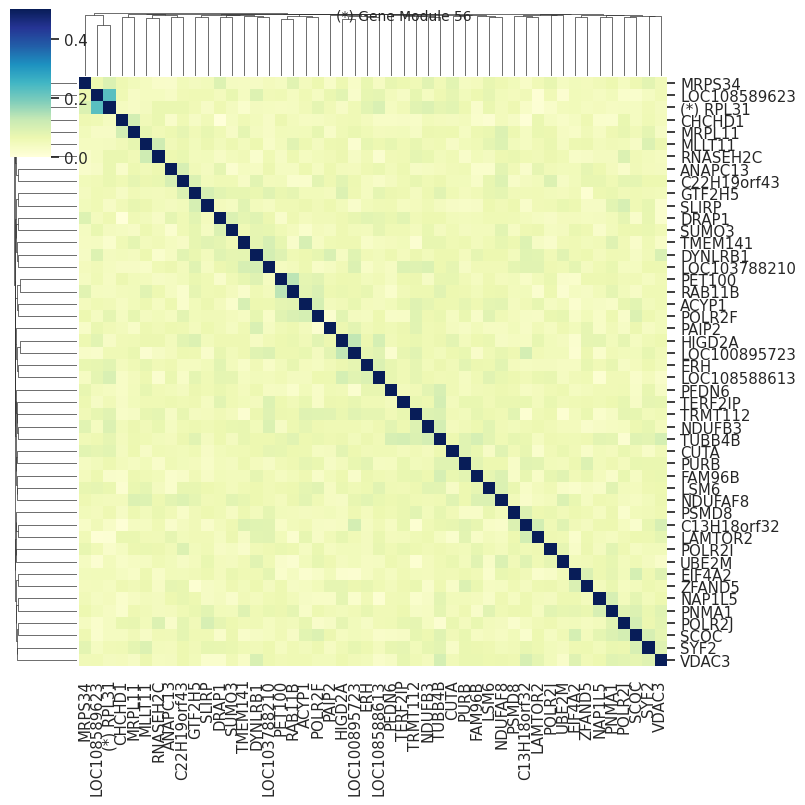

<Figure size 580x580 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 580x580 with 0 Axes>

<Figure size 925x925 with 0 Axes>

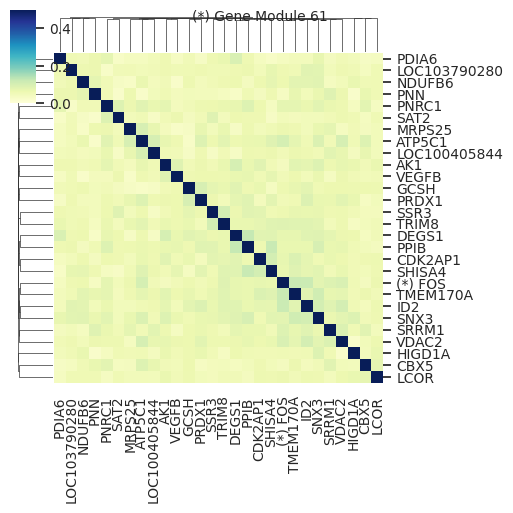

<Figure size 625x625 with 0 Axes>

<Figure size 670x670 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 220x220 with 0 Axes>

<Figure size 535x535 with 0 Axes>

<Figure size 955x955 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1060x1060 with 0 Axes>

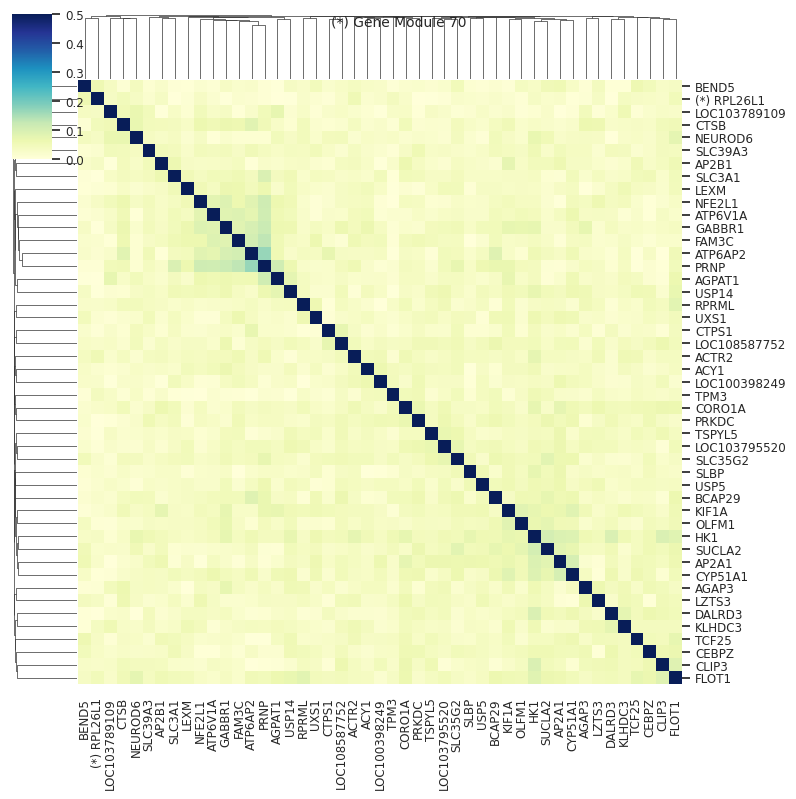

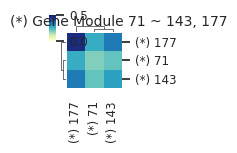

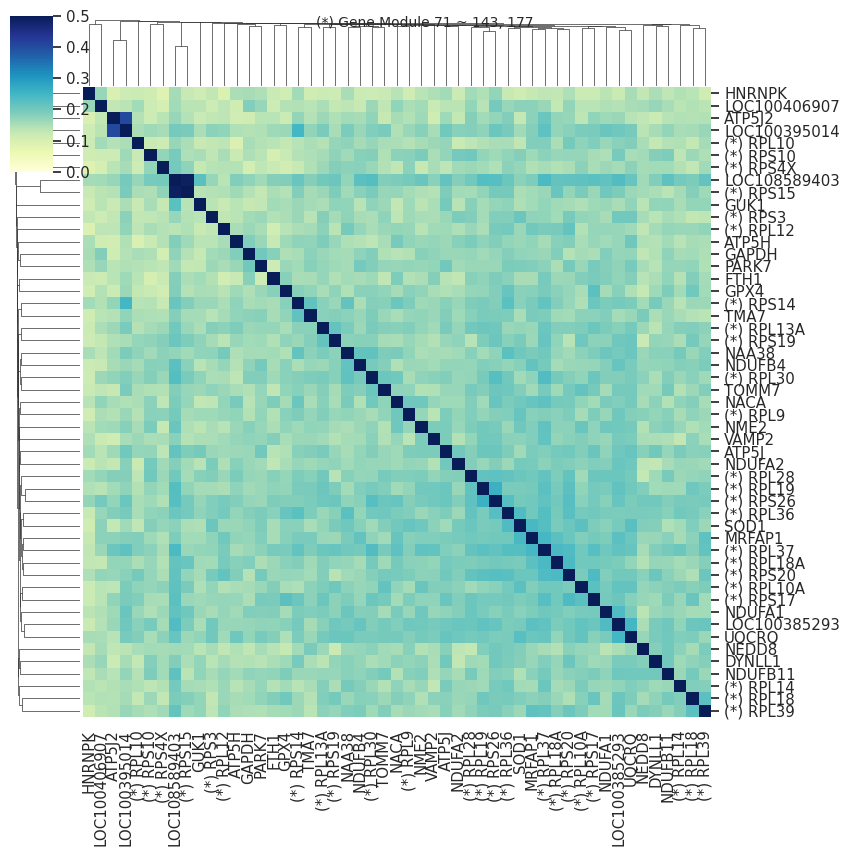

<Figure size 535x535 with 0 Axes>

<Figure size 880x880 with 0 Axes>

<Figure size 940x940 with 0 Axes>

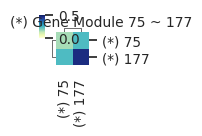

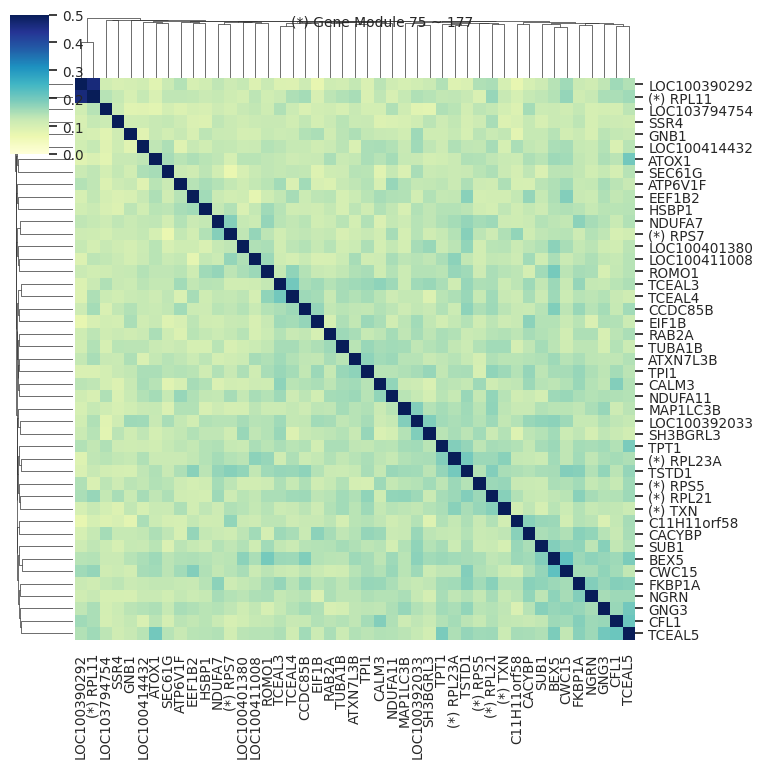

<Figure size 655x655 with 0 Axes>

<Figure size 775x775 with 0 Axes>

<Figure size 295x295 with 0 Axes>

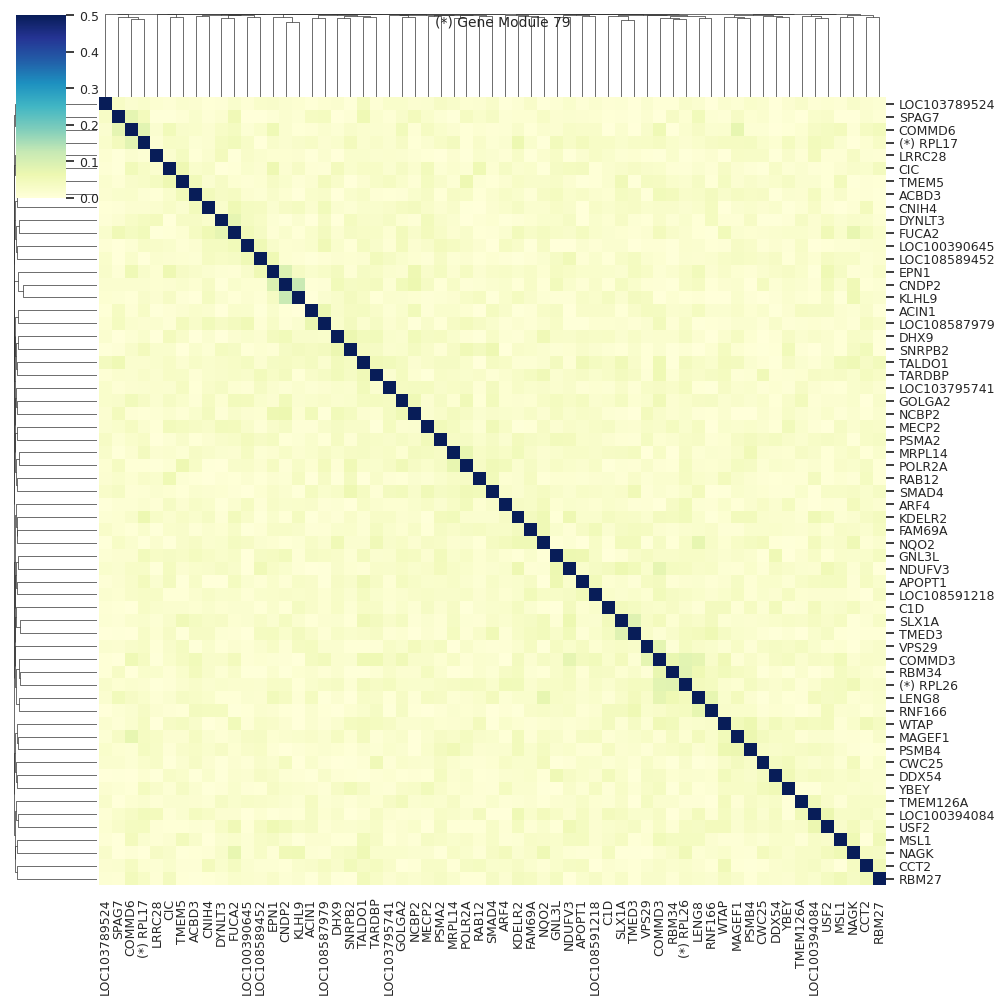

<Figure size 1000x1000 with 0 Axes>

<Figure size 595x595 with 0 Axes>

<Figure size 985x985 with 0 Axes>

<Figure size 985x985 with 0 Axes>

<Figure size 835x835 with 0 Axes>

<Figure size 655x655 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 295x295 with 0 Axes>

<Figure size 265x265 with 0 Axes>

<Figure size 1060x1060 with 0 Axes>

<Figure size 580x580 with 0 Axes>

<Figure size 760x760 with 0 Axes>

<Figure size 370x370 with 0 Axes>

<Figure size 655x655 with 0 Axes>

<Figure size 835x835 with 0 Axes>

<Figure size 490x490 with 0 Axes>

<Figure size 940x940 with 0 Axes>

<Figure size 925x925 with 0 Axes>

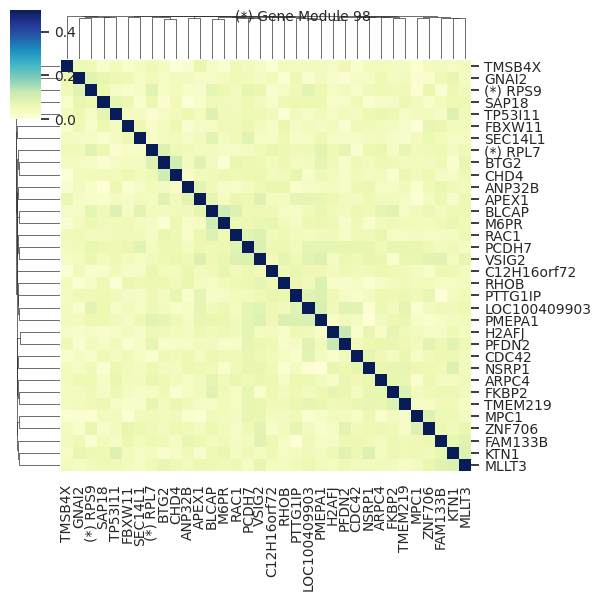

<Figure size 190x190 with 0 Axes>

<Figure size 775x775 with 0 Axes>

<Figure size 805x805 with 0 Axes>

<Figure size 445x445 with 0 Axes>

<Figure size 790x790 with 0 Axes>

<Figure size 1030x1030 with 0 Axes>

<Figure size 760x760 with 0 Axes>

<Figure size 475x475 with 0 Axes>

<Figure size 205x205 with 0 Axes>

<Figure size 460x460 with 0 Axes>

<Figure size 325x325 with 0 Axes>

<Figure size 1060x1060 with 0 Axes>

<Figure size 1060x1060 with 0 Axes>

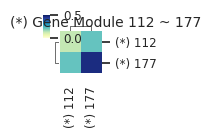

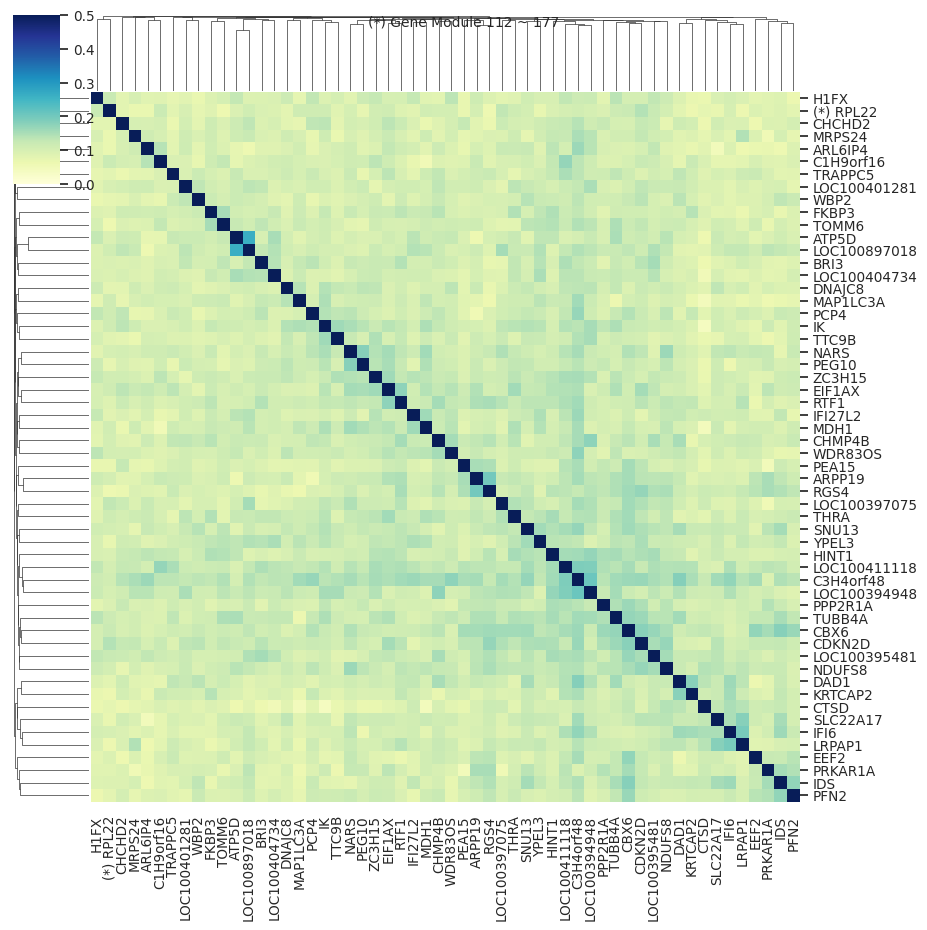

<Figure size 340x340 with 0 Axes>

<Figure size 505x505 with 0 Axes>

<Figure size 670x670 with 0 Axes>

<Figure size 820x820 with 0 Axes>

<Figure size 895x895 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 565x565 with 0 Axes>

<Figure size 235x235 with 0 Axes>

<Figure size 610x610 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 850x850 with 0 Axes>

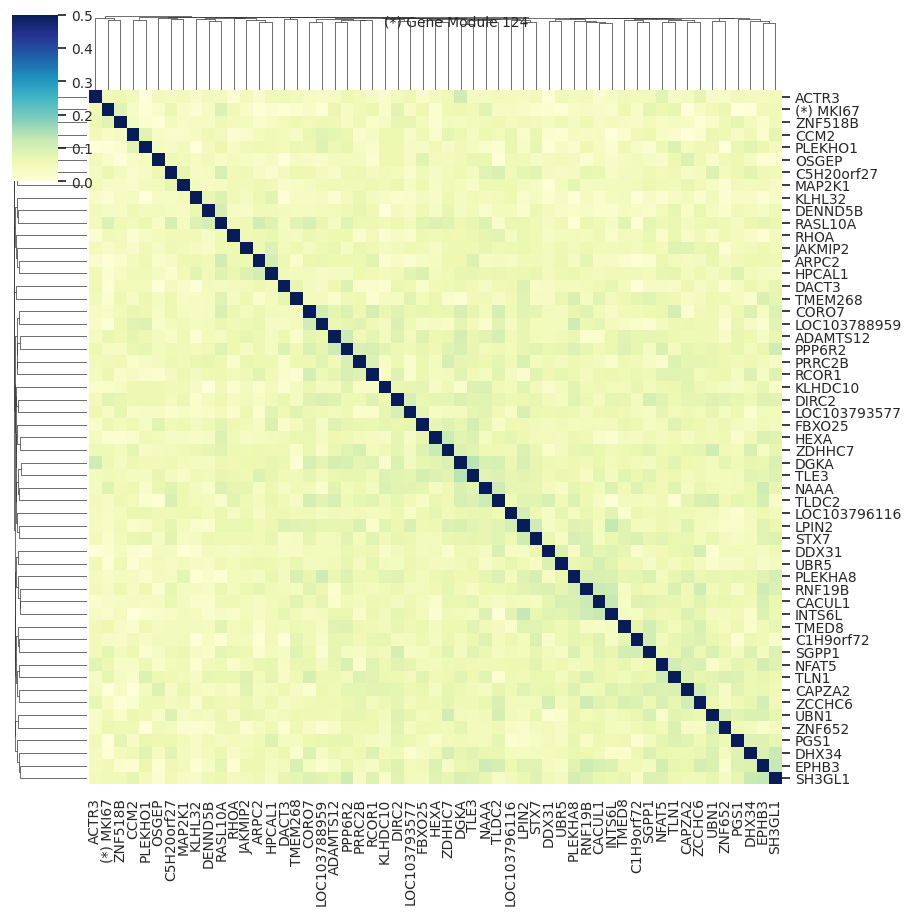

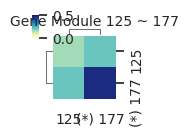

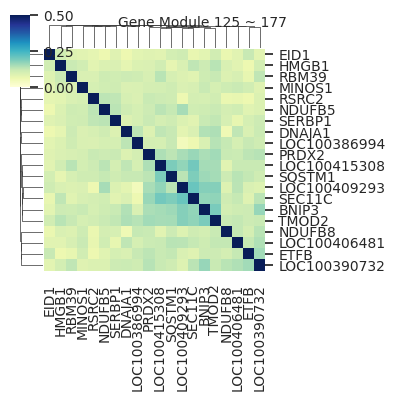

<Figure size 445x445 with 0 Axes>

<Figure size 550x550 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 925x925 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 835x835 with 0 Axes>

<Figure size 775x775 with 0 Axes>

<Figure size 1030x1030 with 0 Axes>

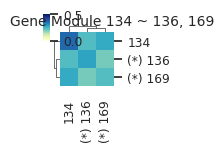

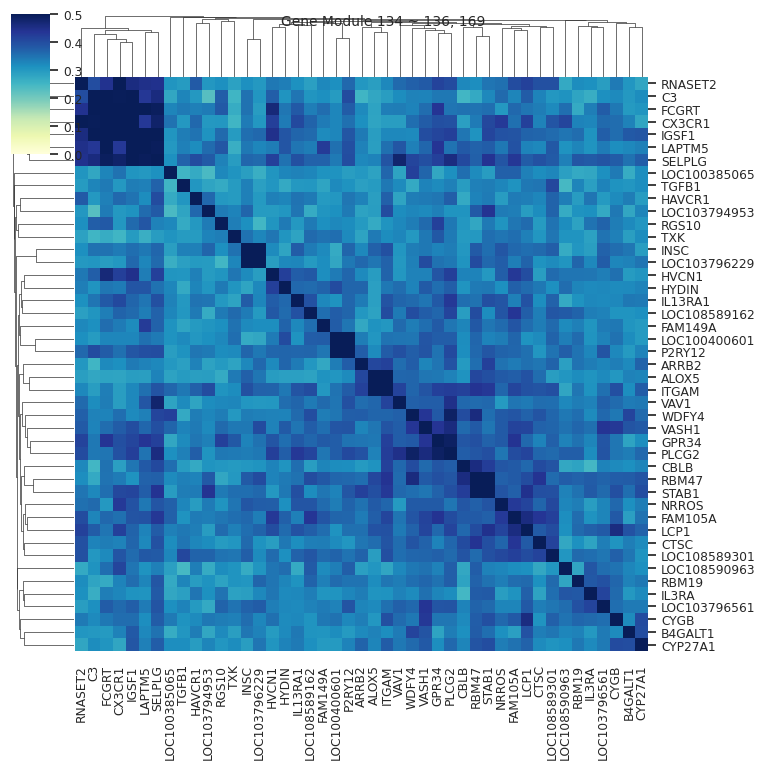

<Figure size 385x385 with 0 Axes>

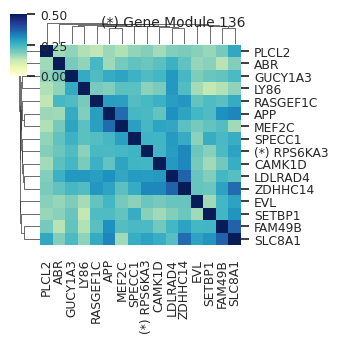

<Figure size 880x880 with 0 Axes>

<Figure size 310x310 with 0 Axes>

<Figure size 430x430 with 0 Axes>

<Figure size 1045x1045 with 0 Axes>

<Figure size 520x520 with 0 Axes>

<Figure size 490x490 with 0 Axes>

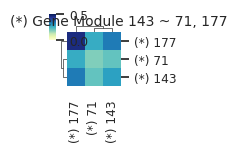

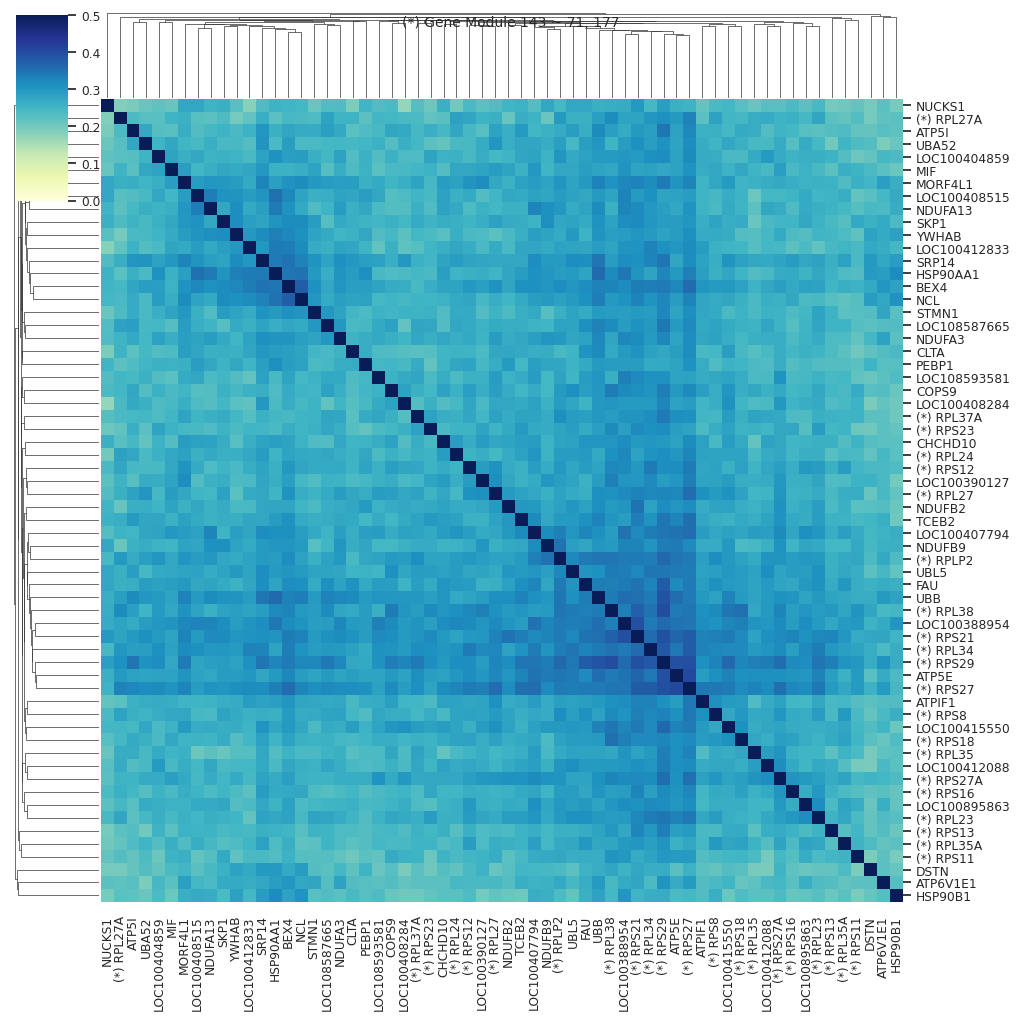

<Figure size 535x535 with 0 Axes>

<Figure size 610x610 with 0 Axes>

<Figure size 970x970 with 0 Axes>

<Figure size 505x505 with 0 Axes>

<Figure size 940x940 with 0 Axes>

<Figure size 850x850 with 0 Axes>

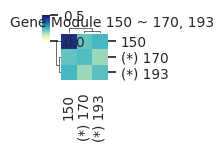

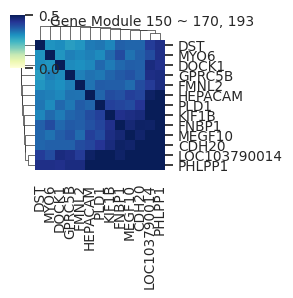

<Figure size 880x880 with 0 Axes>

<Figure size 610x610 with 0 Axes>

<Figure size 355x355 with 0 Axes>

<Figure size 400x400 with 0 Axes>

<Figure size 850x850 with 0 Axes>

<Figure size 445x445 with 0 Axes>

<Figure size 370x370 with 0 Axes>

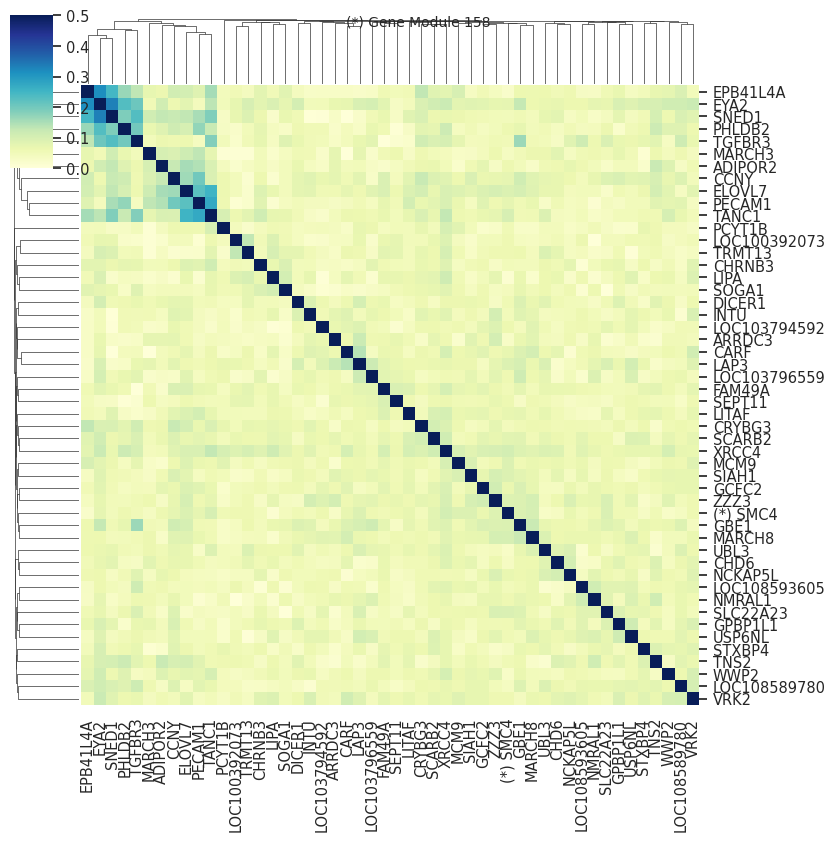

<Figure size 985x985 with 0 Axes>

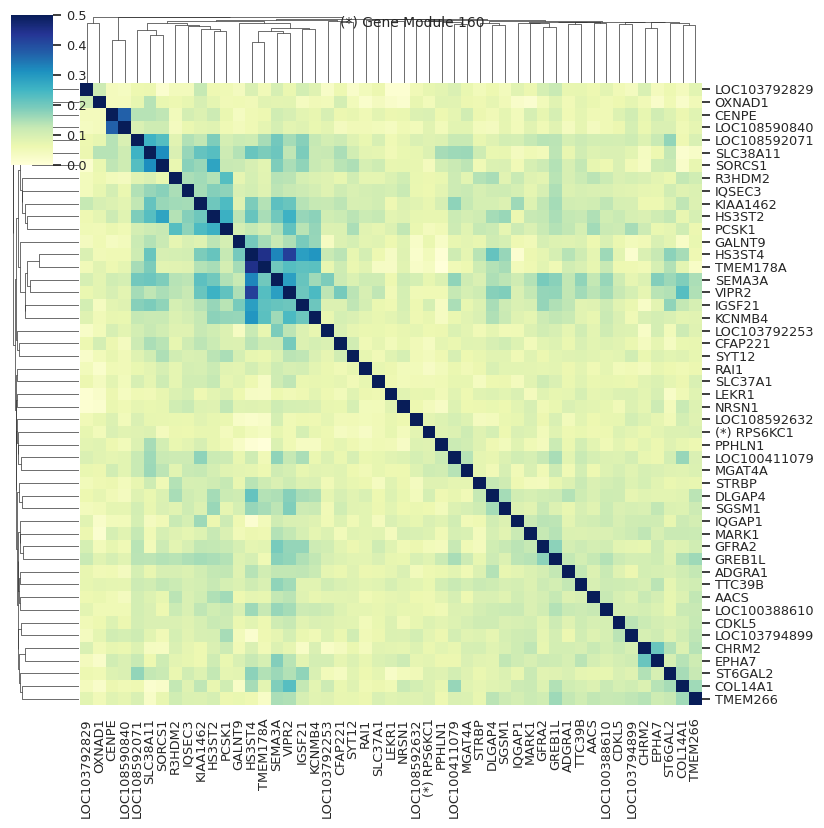

<Figure size 1000x1000 with 0 Axes>

<Figure size 550x550 with 0 Axes>

<Figure size 775x775 with 0 Axes>

<Figure size 1015x1015 with 0 Axes>

<Figure size 1045x1045 with 0 Axes>

<Figure size 940x940 with 0 Axes>

<Figure size 730x730 with 0 Axes>

<Figure size 760x760 with 0 Axes>

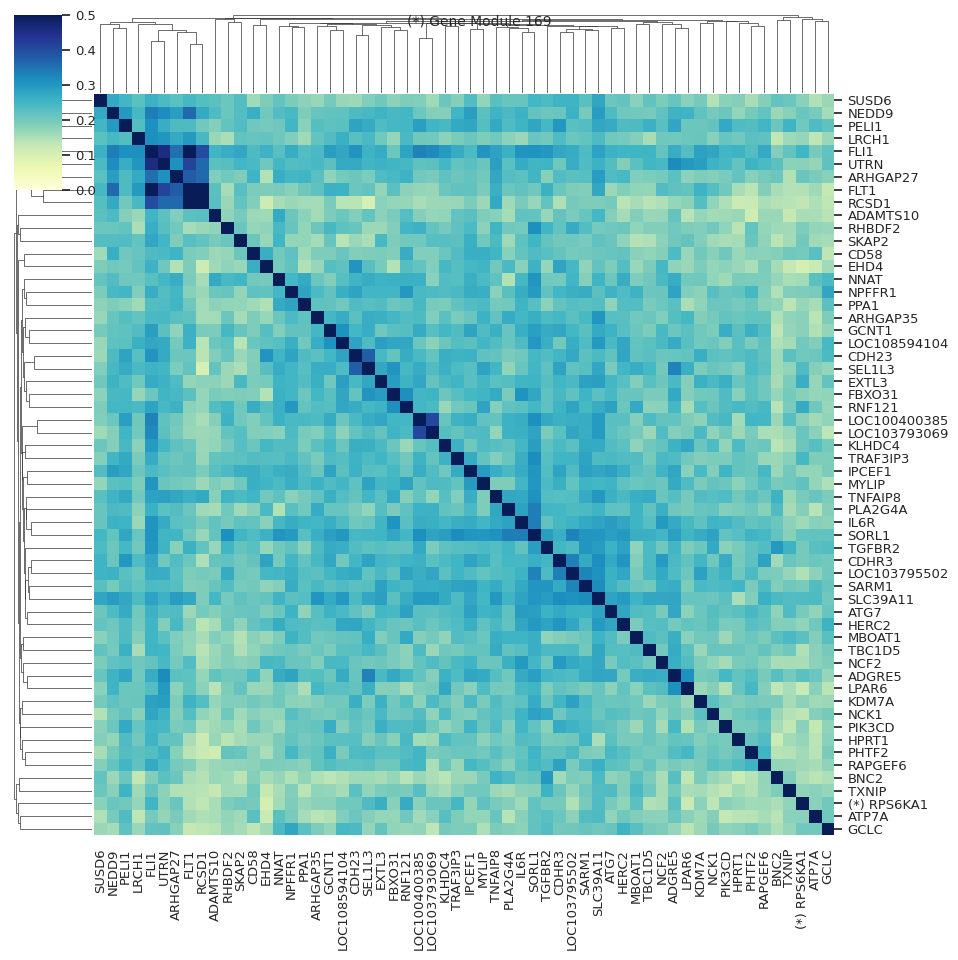

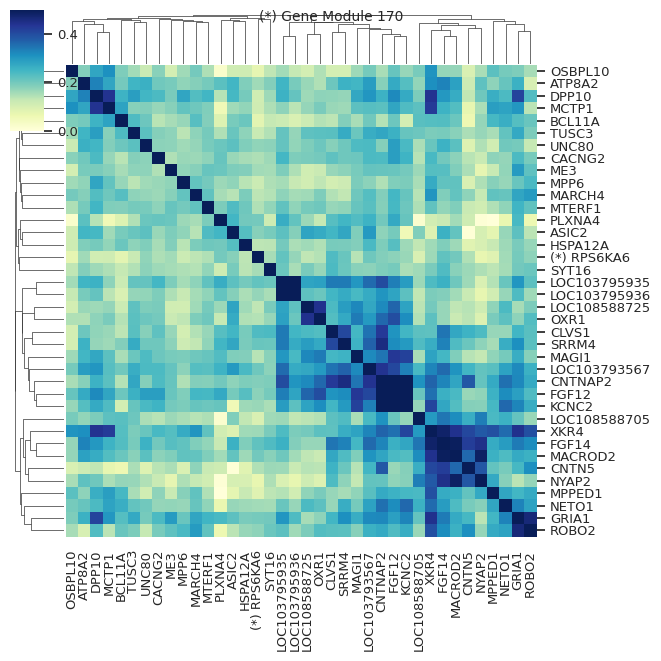

<Figure size 850x850 with 0 Axes>

<Figure size 775x775 with 0 Axes>

<Figure size 805x805 with 0 Axes>

<Figure size 595x595 with 0 Axes>

<Figure size 865x865 with 0 Axes>

<Figure size 700x700 with 0 Axes>

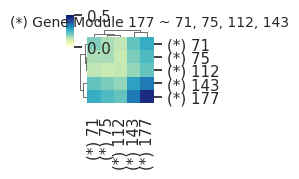

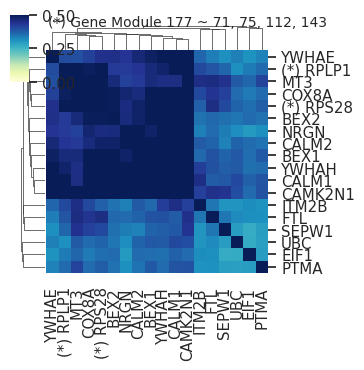

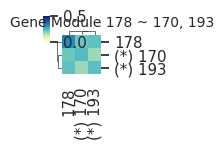

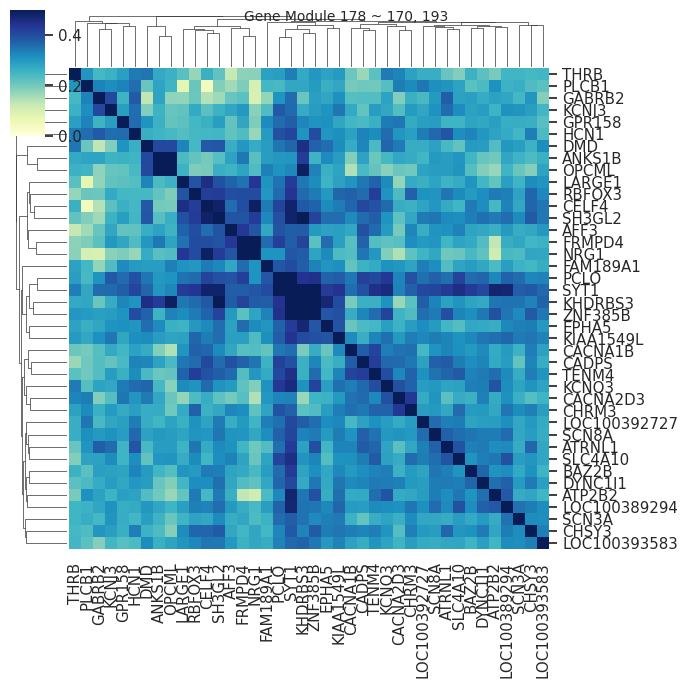

<Figure size 670x670 with 0 Axes>

<Figure size 1030x1030 with 0 Axes>

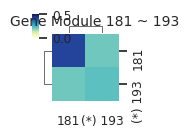

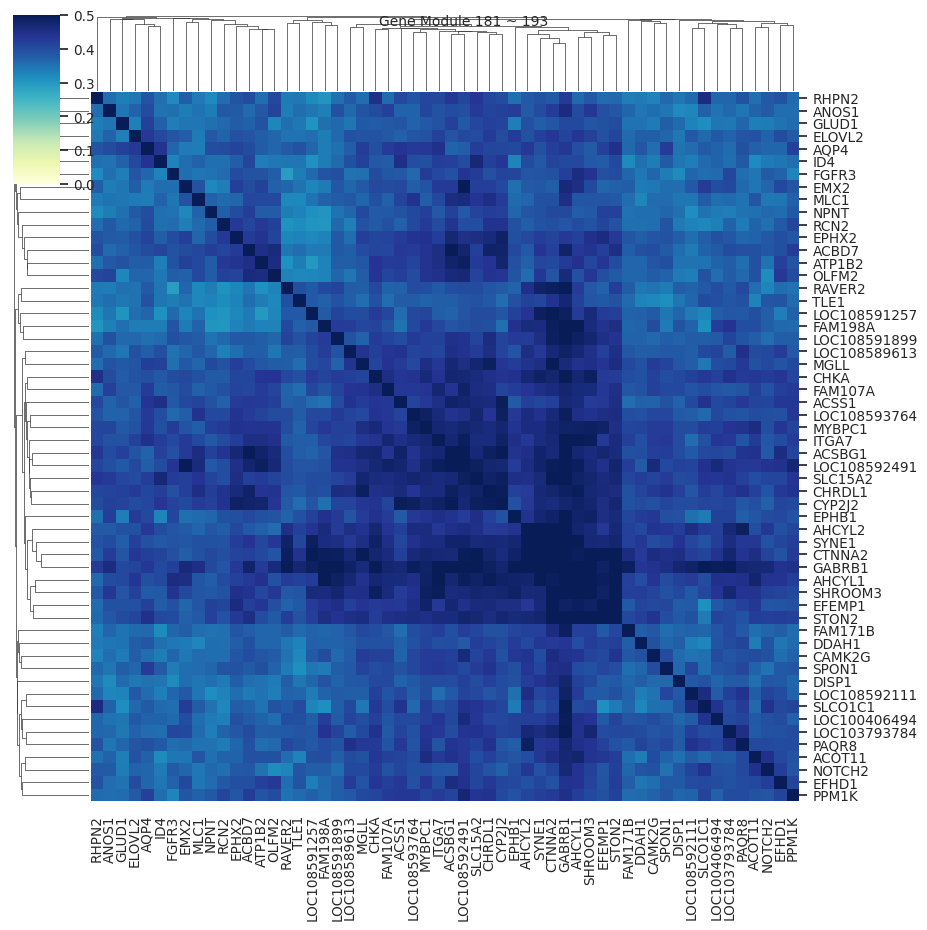

<Figure size 535x535 with 0 Axes>

<Figure size 940x940 with 0 Axes>

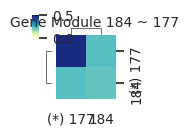

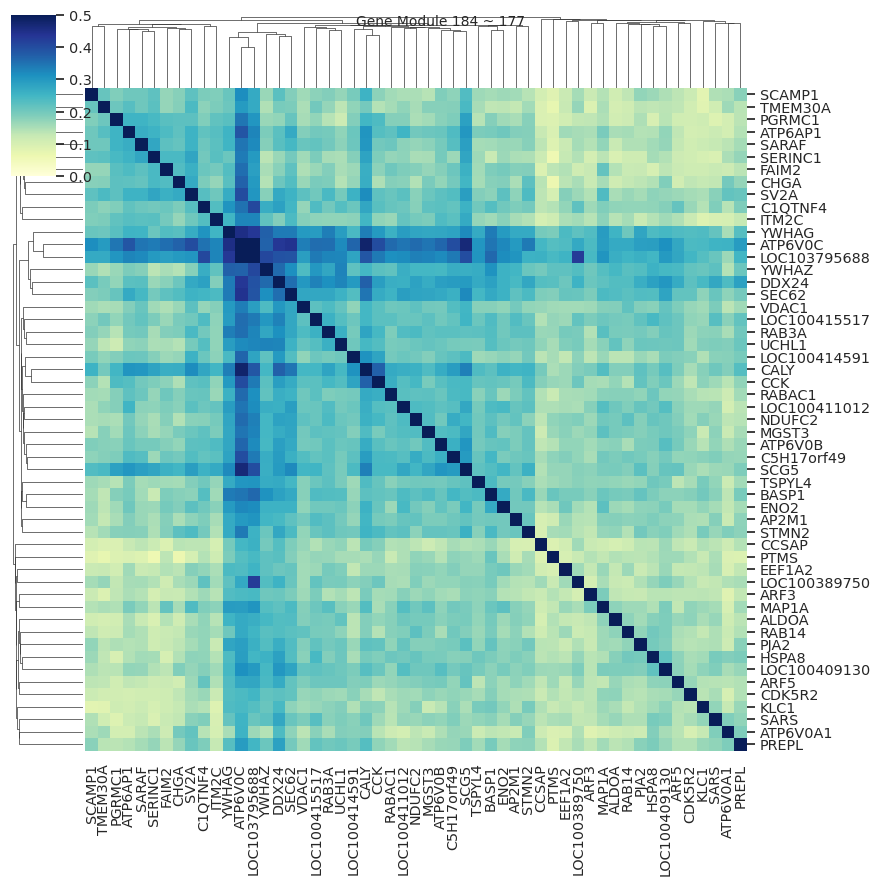

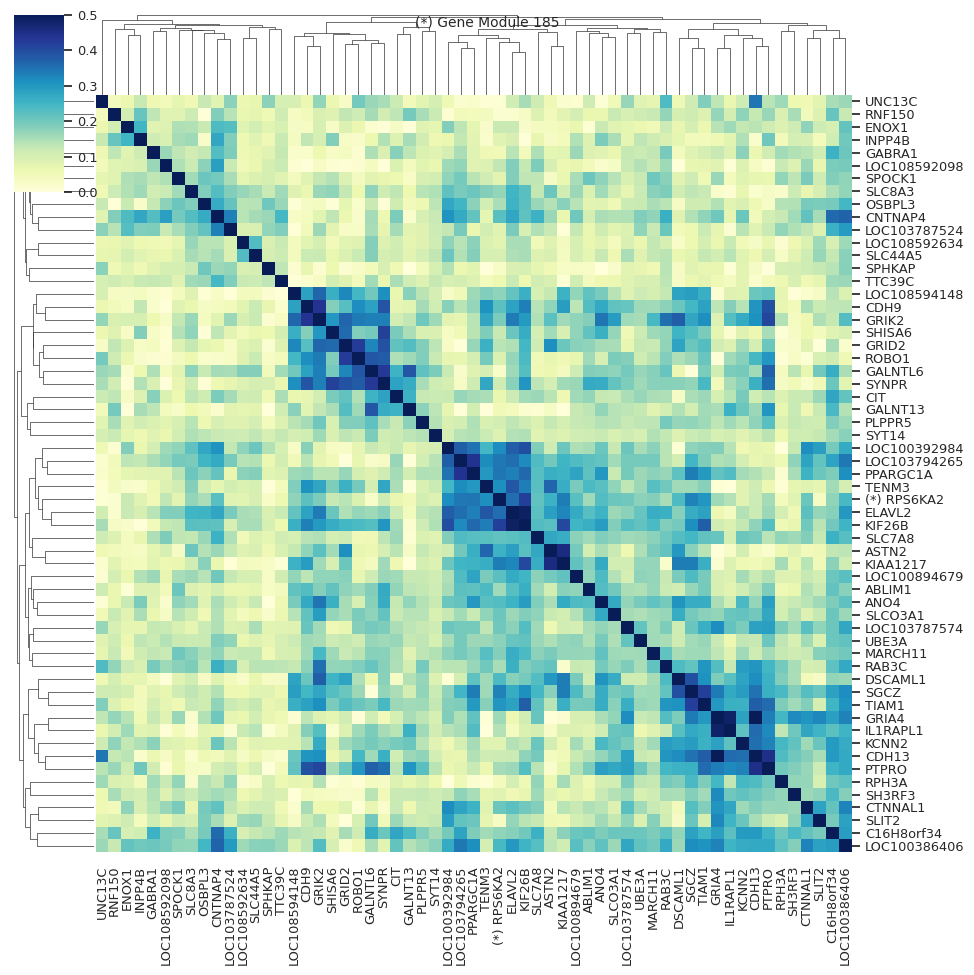

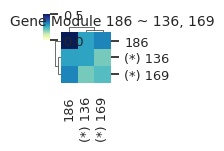

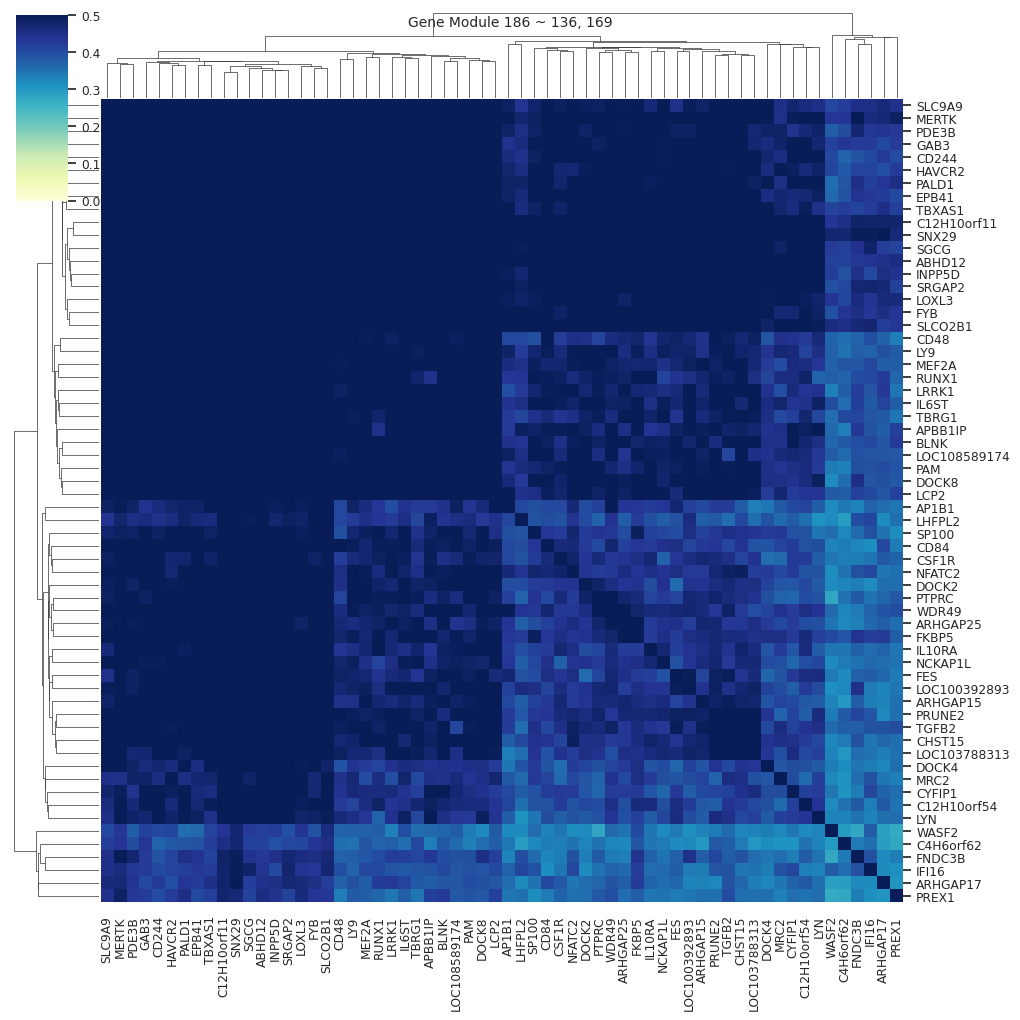

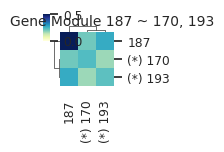

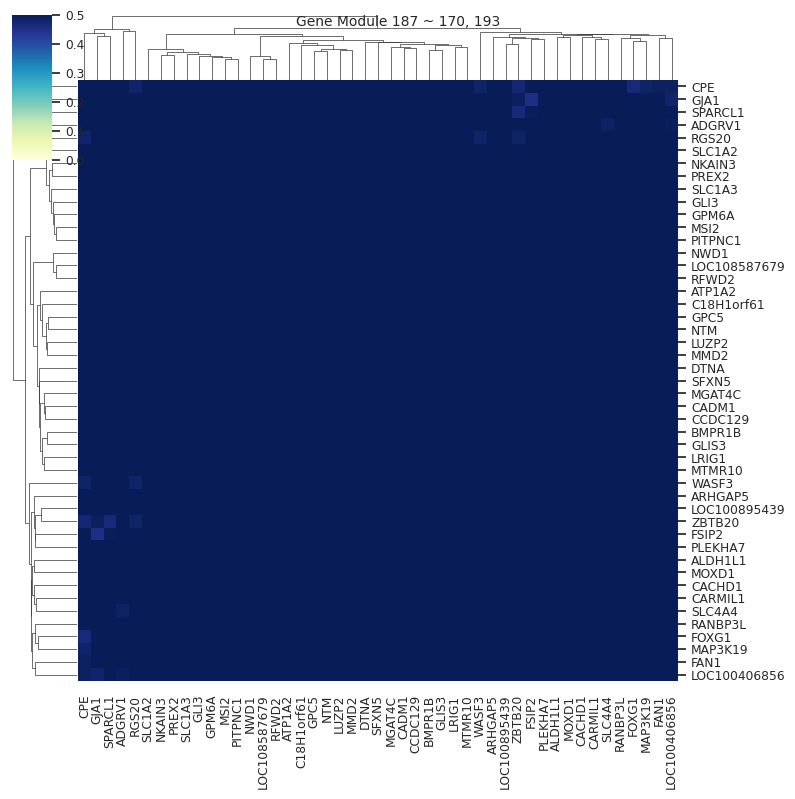

<Figure size 625x625 with 0 Axes>

<Figure size 580x580 with 0 Axes>

<Figure size 670x670 with 0 Axes>

<Figure size 715x715 with 0 Axes>

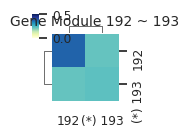

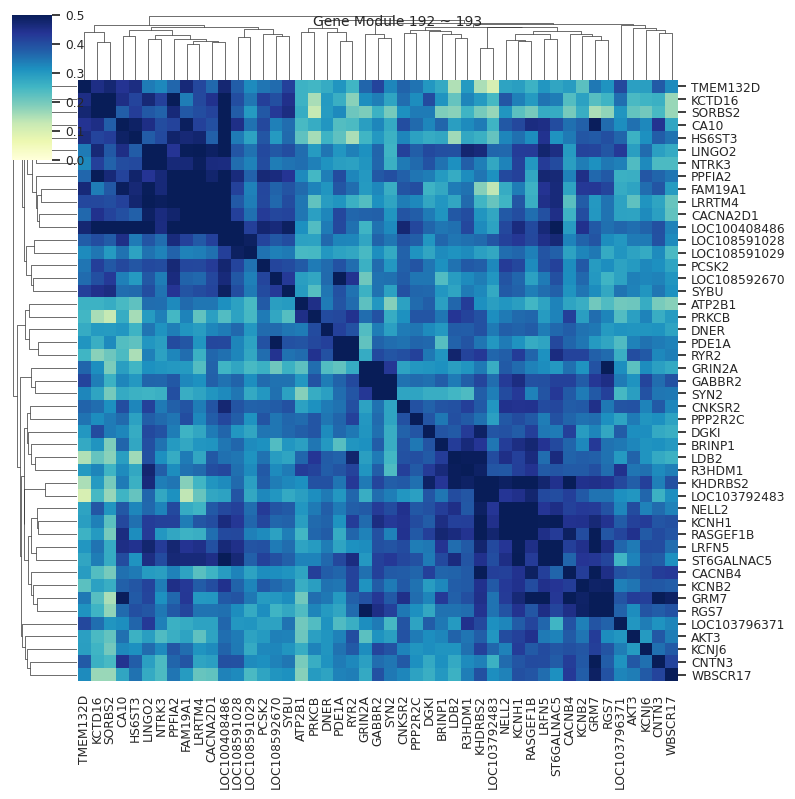

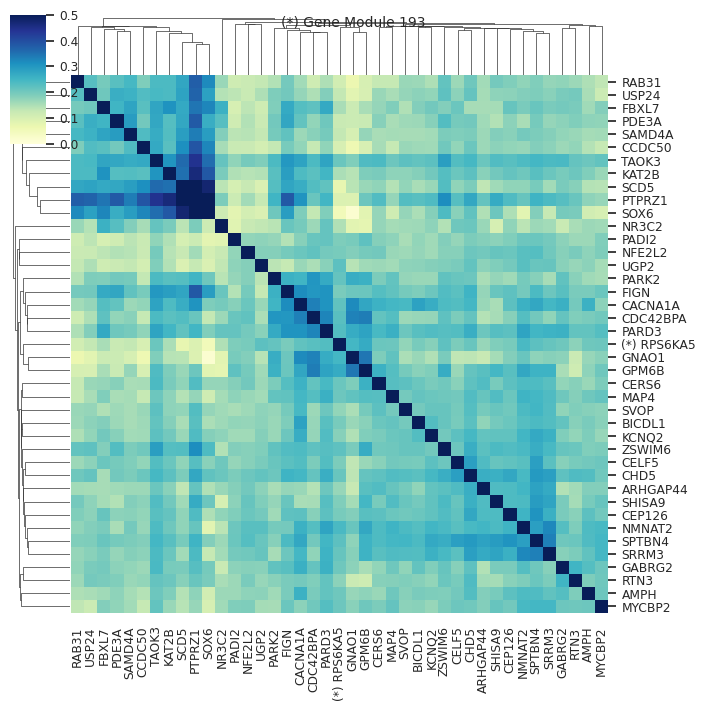

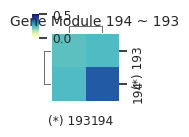

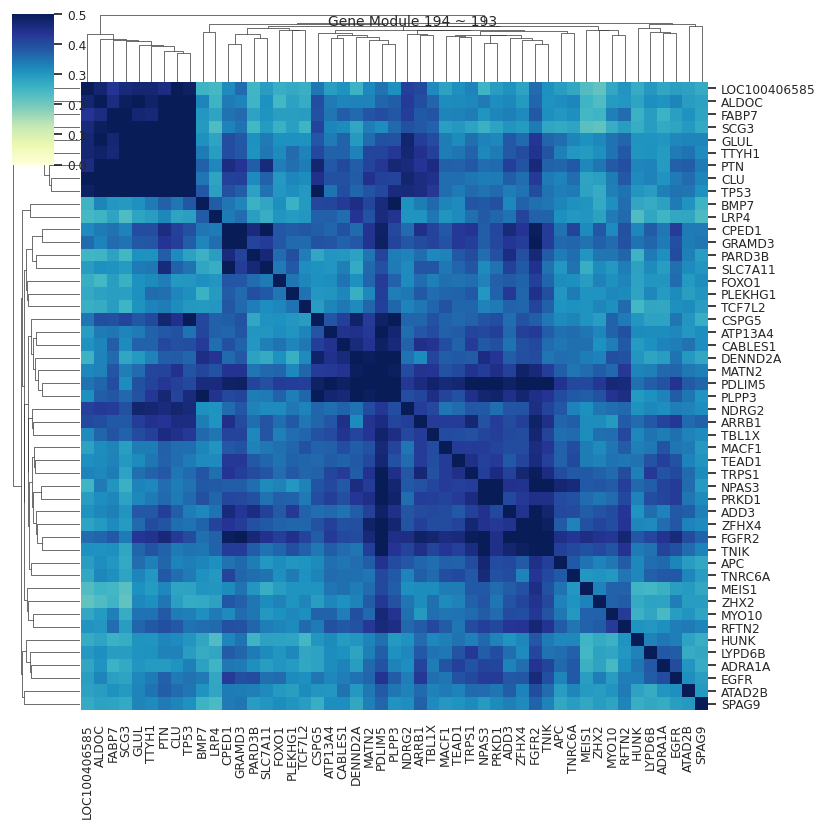

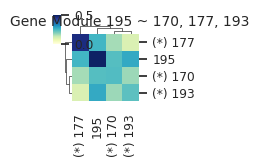

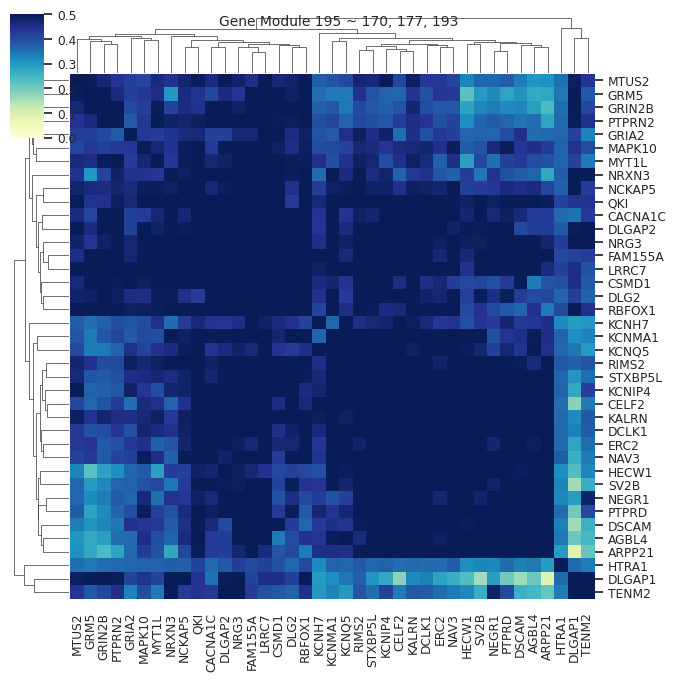

<Figure size 865x865 with 0 Axes>

In [35]:
SHOW_CORRELATED_MODULES = 0.2 # Show non-lateral modules if correlated to lateral modules.
MIN_SIMILARITY_TO_SHOW = 0.2 # Show modules only if there's at least this correlation

base_lateral_gene_modules = np.unique(module_per_gene.values[base_lateral_genes_mask])
base_lateral_gene_modules = base_lateral_gene_modules[base_lateral_gene_modules >= 0]
similarity_of_genes = mc.ut.get_vv_frame(cells, "lateral_genes_similarity")

for gene_module in range(np.max(module_per_gene) + 1):
    if module_per_gene[module_per_gene.values == gene_module].size > 1:
        module_genes_mask = module_per_gene.values == gene_module
        similarity_of_module = similarity_of_genes.loc[module_genes_mask, module_genes_mask]
        similarity_of_module.index = similarity_of_module.columns = [
            "(*) " + name if name in base_lateral_gene_names else name
            for name in similarity_of_module.index
        ]
        
        mask = similarity_of_module.values.copy()
        np.fill_diagonal(mask, 0.0)
        max_value = np.max(mask)
        show_in_notebook = gene_module in base_lateral_gene_modules or max_value >= MIN_SIMILARITY_TO_SHOW
     
        similarity_to_laterals = similarity_of_modules.iloc[gene_module, base_lateral_gene_modules]
        similar_lateral_modules_mask = similarity_to_laterals >= SHOW_CORRELATED_MODULES
        similar_lateral_modules = base_lateral_gene_modules[np.where(similar_lateral_modules_mask)[0]]
        if gene_module not in base_lateral_gene_modules and len(similar_lateral_modules) == 0:
            show_in_notebook = False
            
        prefix = "(*) " if gene_module in base_lateral_gene_modules else ""
        suffix = ", ".join([
            str(similar_lateral_module)
            for similar_lateral_module
            in similar_lateral_modules
            if similar_lateral_module != gene_module
        ])
        if suffix != "":
            suffix = " ~ " + suffix
        title = f"{prefix}Gene Module {gene_module}{suffix}"
            
        if len(similar_lateral_modules) > 0:
            with_lateral_modules = set(similar_lateral_modules)
            with_lateral_modules.add(gene_module)
            with_lateral_modules = sorted(with_lateral_modules)
            if len(with_lateral_modules) > 1:
                similarity_with_module = \
                    similarity_of_modules.iloc[with_lateral_modules, :].iloc[:, with_lateral_modules]
    
                size = similarity_with_module.shape[0]
                if size > 50:
                    sb.set(font_scale=50 / size)
                size = size * 0.15 + 1
                cm = sb.clustermap(
                    similarity_with_module,
                    figsize=(size, size),
                    vmin=0, vmax=0.5,
                    xticklabels=True, yticklabels=True,
                    dendrogram_ratio=0.1,
                    cmap="YlGnBu",
                )
                cm.fig.suptitle(title, fontsize=10)
                if show_in_notebook:
                    plt.show()
                else:
                    plt.clf()
    
        size = similarity_of_module.shape[0]
        if size > 50:
            sb.set(font_scale=50 / size)
        size = size * 0.15 + 1
        cm = sb.clustermap(
            similarity_of_module,
            figsize=(size, size),
            vmin=0, vmax=0.5,
            xticklabels=True, yticklabels=True,
            dendrogram_ratio=0.1,
            cmap="YlGnBu",
        )
        cm.fig.suptitle(title, fontsize=10)
        if show_in_notebook:
            plt.show()
        else:
            plt.clf()

In [37]:
LATERAL_GENE_MODULES = [
    71, 143, 177,  # Ribosomal.
]
SPECIFIC_LATERAL_GENES = ["DUSP1"]  # Stress

In [38]:
for gene_module in LATERAL_GENE_MODULES:
    module_genes_mask = module_per_gene == gene_module
    update_lateral_genes(names=cells.var_names[module_genes_mask], op="add", show=False)
update_lateral_genes(names=SPECIFIC_LATERAL_GENES, op="add", show=False)


set marmoset_mtg_iteration1.var[lateral_gene]: 129 true (0.4756%) out of 27124 bools
set marmoset_mtg_iteration1.var[lateral_gene]: 170 true (0.6268%) out of 27124 bools
set marmoset_mtg_iteration1.var[lateral_gene]: 186 true (0.6857%) out of 27124 bools
set marmoset_mtg_iteration1.var[lateral_gene]: 187 true (0.6894%) out of 27124 bools


In [39]:
# Either use the guesstimator:
max_parallel_piles = mc.pl.guess_max_parallel_piles(cells)
# Or, if running out of memory manually override:
# max_paralle_piles = ...
print(max_parallel_piles)
mc.pl.set_max_parallel_piles(max_parallel_piles)

439


In [40]:
with mc.ut.progress_bar():
    mc.pl.divide_and_conquer_pipeline(cells, random_seed=123456, )

Detect rare gene modules...
/nfs/research/icortes/ysong/anaconda3/envs/metacells094/lib/python3.11/site-packages/anndata/_core/anndata.py:1118: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
  0%|          [00:00]/nfs/research/icortes/ysong/anaconda3/envs/metacells094/lib/python3.11/site-packages/anndata/_core/anndata.py:1118: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/nfs/research/icortes/ysong/anaconda3/envs/metacells094/lib/python3.11/site-packages/anndata/_core/anndata.py:1118: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/nfs/research/icortes/ysong/anaconda3/envs/metacells094/

In [41]:
metacells = mc.pl.collect_metacells(cells, name="marmoset_mtg_metacells", random_seed=123456)
print(f"Iteration 1: {metacells.n_obs} metacells, {metacells.n_vars} genes")

set marmoset_mtg_metacells.obs[grouped]: 3031 int64s
set marmoset_mtg_metacells.obs[total_umis]: 3031 int64s
set marmoset_mtg_metacells.layers[total_umis]: ndarray 3031 X 27124 float32s
set marmoset_mtg_metacells.obs[__zeros_downsample_umis]: 3031 int64s
set marmoset_mtg_metacells.layers[zeros]: ndarray 3031 X 27124 int32s
set marmoset_mtg_iteration1.obs[metacell_name]: 75861 <U8s
set marmoset_mtg_metacells.var[name]: 27124 objects
set marmoset_mtg_metacells.var[bursty_lonely_gene]: 0 true (0%) out of 27124 bools
set marmoset_mtg_metacells.var[properly_sampled_gene]: 27124 true (100%) out of 27124 bools
set marmoset_mtg_metacells.var[excluded_gene]: 0 true (0%) out of 27124 bools
set marmoset_mtg_metacells.var[full_gene_index]: 27124 int32s
set marmoset_mtg_metacells.var[lateral_gene]: 187 true (0.6894%) out of 27124 bools
set marmoset_mtg_metacells.var[lateral_genes_module]: 27124 int32s
set marmoset_mtg_metacells.var[selected_gene]: 7536 true (27.78%) out of 27124 bools
set marmoset_

Iteration 1: 3031 metacells, 27124 genes


In [57]:
metacells

AnnData object with n_obs × n_vars = 3031 × 27124
    obs: 'grouped', 'total_umis', '__zeros_downsample_umis', 'metacells_rare_gene_module', 'rare_metacell', 'cell_type', 'cell_type_fraction_of_L2/3-6 intratelencephalic projecting glutamatergic cortical neuron', 'cell_type_fraction_of_L5 extratelencephalic projecting glutamatergic cortical neuron', 'cell_type_fraction_of_L6b glutamatergic cortical neuron', 'cell_type_fraction_of_astrocyte of the cerebral cortex', 'cell_type_fraction_of_caudal ganglionic eminence derived GABAergic cortical interneuron', 'cell_type_fraction_of_cerebral cortex endothelial cell', 'cell_type_fraction_of_chandelier pvalb GABAergic cortical interneuron', 'cell_type_fraction_of_corticothalamic-projecting glutamatergic cortical neuron', 'cell_type_fraction_of_lamp5 GABAergic cortical interneuron', 'cell_type_fraction_of_microglial cell', 'cell_type_fraction_of_near-projecting glutamatergic cortical neuron', 'cell_type_fraction_of_oligodendrocyte', 'cell_type_fr

In [58]:
cells.obs

orig.ident  nCount_RNA  nFeature_RNA  \
bi005.temp.rxn1_CACTAAGAGAGCTTTC  bi005.temp.rxn1     53342.0        9582.0   
bi005.temp.rxn1_GGATCTAGTCCATAGT  bi005.temp.rxn1     45212.0        8878.0   
bi005.temp.rxn1_CCTCAGTTCCTTATGT  bi005.temp.rxn1     44806.0        8157.0   
bi005.temp.rxn1_CTCAGGGCAGCTTCCT  bi005.temp.rxn1     41711.0        8580.0   
bi005.temp.rxn1_TGTAAGCTCGGCCAAC  bi005.temp.rxn1     37667.0        8030.0   
...                                           ...         ...           ...   
bi007.temp.rxn2_GATTCTTTCTGACGCG  bi007.temp.rxn2      3440.0        1874.0   
bi007.temp.rxn2_TATTTCGAGAGCAGTC  bi007.temp.rxn2      3413.0        1753.0   
bi007.temp.rxn2_TGTGGCGTCGTGGCGT  bi007.temp.rxn2      3093.0        1746.0   
bi007.temp.rxn2_TTCCGTGCATCGAGCC  bi007.temp.rxn2      2346.0        1425.0   
bi007.temp.rxn2_TTCACGCTCTAGTTCT  bi007.temp.rxn2      1615.0         999.0   

                                                              ...1  \
bi005.temp.rxn1_CACTAAGAGAGCTTTC  bi005.temp.rxn1_CACTAAGAGAGCTTTC   
bi005.temp.rxn1_GGATCTAGTCCATAGT  bi005.temp.rxn1_GGATCTAGTCCATAGT   
bi005.temp.rxn1_CCTCAGTTCCTTATGT  bi005.temp.rxn1_CCTCAGTTCCTTATGT   
bi005.temp.rxn1_CTCAGGGCAGCTTCCT  bi005.temp.rxn1_CTCAGGGCAGCTTCCT   
bi005.temp.rxn1_TGTAAGCTCGGCCAAC  bi005.temp.rxn1_TGTAAGCTCGGCCAAC   
...                                                            ...   
bi007.temp.rxn2_GATTCTTTCTGACGCG  bi007.temp.rxn2_GATTCTTTCTGACGCG   
bi007.temp.rxn2_TATTTCGAGAGCAGTC  bi007.temp.rxn2_TATTTCGAGAGCAGTC   
bi007.temp.rxn2_TGTGGCGTCGTGGCGT  bi007.temp.rxn2_TGTGGCGTCGTGGCGT   
bi007.temp.rxn2_TTCCGTGCATCGAGCC  bi007.temp.rxn2_TTCCGTGCATCGAGCC   
bi007.temp.rxn2_TTCACGCTCTAGTTCT  bi007.temp.rxn2_TTCACGCTCTAGTTCT   

                                       Cluster Neighborhood    Subclass  \
bi005.temp.rxn1_CACTAAGAGAGCTTTC        Endo_2         glia        Endo   
bi005.temp.rxn1_GGATCTAGTCCATAGT       Astro_3         glia       Astro   
bi005.temp.rxn1_CCTCAGTTCCTTATGT       Astro_3         glia       Astro   
bi005.temp.rxn1_CTCAGGGCAGCTTCCT       Astro_3         glia       Astro   
bi005.temp.rxn1_TGTAAGCTCGGCCAAC        Endo_2         glia        Endo   
...                                        ...          ...         ...   
bi007.temp.rxn2_GATTCTTTCTGACGCG       L5 IT_3     it_types       L5 IT   
bi007.temp.rxn2_TATTTCGAGAGCAGTC  L6 IT Car3_2     it_types  L6 IT Car3   
bi007.temp.rxn2_TGTGGCGTCGTGGCGT     L2/3 IT_1     it_types     L2/3 IT   
bi007.temp.rxn2_TTCCGTGCATCGAGCC     L2/3 IT_4     it_types     L2/3 IT   
bi007.temp.rxn2_TTCACGCTCTAGTTCT  L6 IT Car3_2     it_types  L6 IT Car3   

                                 CrossSpeciesCluster assay_ontology_term_id  \
bi005.temp.rxn1_CACTAAGAGAGCTTTC              Endo_1            EFO:0009922   
bi005.temp.rxn1_GGATCTAGTCCATAGT             Astro_1            EFO:0009922   
bi005.temp.rxn1_CCTCAGTTCCTTATGT             Astro_1            EFO:0009922   
bi005.temp.rxn1_CTCAGGGCAGCTTCCT             Astro_1            EFO:0009922   
bi005.temp.rxn1_TGTAAGCTCGGCCAAC              Endo_1            EFO:0009922   
...                                              ...                    ...   
bi007.temp.rxn2_GATTCTTTCTGACGCG             L5 IT_1            EFO:0009922   
bi007.temp.rxn2_TATTTCGAGAGCAGTC        L6 IT Car3_2            EFO:0009922   
bi007.temp.rxn2_TGTGGCGTCGTGGCGT           L2/3 IT_3            EFO:0009922   
bi007.temp.rxn2_TTCCGTGCATCGAGCC           L2/3 IT_1            EFO:0009922   
bi007.temp.rxn2_TTCACGCTCTAGTTCT        L6 IT Car3_2            EFO:0009922   

                                 cell_type_ontology_term_id  ...  \
bi005.temp.rxn1_CACTAAGAGAGCTTTC                 CL:1001602  ...   
bi005.temp.rxn1_GGATCTAGTCCATAGT                 CL:0002605  ...   
bi005.temp.rxn1_CCTCAGTTCCTTATGT                 CL:0002605  ...   
bi005.temp.rxn1_CTCAGGGCAGCTTCCT                 CL:0002605  ...   
bi005.temp.rxn1_TGTAAGCTCGGCCAAC                 CL:1001602

In [60]:
# We'll reuse this through the iterations.
def convey_cell_annotations_to_metacells(anno_col, anno_col_target) -> None:
    
    # Assign a single value for each metacell based on the cells.
    mc.tl.convey_obs_to_group(
        adata=cells, gdata=metacells,
        property_name=anno_col, to_property_name=anno_col_target,
        method=mc.ut.most_frequent  # This is the default, for categorical data
    )

    # Compute the fraction of cells with each possible value in each metacell:
    mc.tl.convey_obs_fractions_to_group(
        adata=cells, gdata=metacells,
        property_name=anno_col, to_property_name=anno_col_target,
    )

    
convey_cell_annotations_to_metacells(anno_col='Subclass', anno_col_target='Subclass')

set marmoset_mtg_metacells.obs[Subclass]: 3031 <U10s
set marmoset_mtg_metacells.obs[Subclass_fraction_of_Astro]: 3031 float64s
set marmoset_mtg_metacells.obs[Subclass_fraction_of_Chandelier]: 3031 float64s
set marmoset_mtg_metacells.obs[Subclass_fraction_of_Endo]: 3031 float64s
set marmoset_mtg_metacells.obs[Subclass_fraction_of_L2/3 IT]: 3031 float64s
set marmoset_mtg_metacells.obs[Subclass_fraction_of_L4 IT]: 3031 float64s
set marmoset_mtg_metacells.obs[Subclass_fraction_of_L5 ET]: 3031 float64s
set marmoset_mtg_metacells.obs[Subclass_fraction_of_L5 IT]: 3031 float64s
set marmoset_mtg_metacells.obs[Subclass_fraction_of_L5/6 NP]: 3031 float64s
set marmoset_mtg_metacells.obs[Subclass_fraction_of_L6 CT]: 3031 float64s
set marmoset_mtg_metacells.obs[Subclass_fraction_of_L6 IT]: 3031 float64s
set marmoset_mtg_metacells.obs[Subclass_fraction_of_L6 IT Car3]: 3031 float64s
set marmoset_mtg_metacells.obs[Subclass_fraction_of_L6b]: 3031 float64s
set marmoset_mtg_metacells.obs[Subclass_fraction

In [64]:
metacells.obs['Subclass']

M0.00         L5 ET
M1.57         L5 IT
M2.16         L6 CT
M3.30         L5 IT
M4.24           L6b
             ...   
M3026.80    L2/3 IT
M3027.04    L2/3 IT
M3028.54    L2/3 IT
M3029.27    L2/3 IT
M3030.97    L2/3 IT
Name: Subclass, Length: 3031, dtype: object

In [65]:
set(metacells.obs['Subclass'].astype('category').cat.categories).symmetric_difference(set(adata_10x.obs['Subclass'].cat.categories))

set()

In [66]:
metacells.write("marmoset_metacells_subclass.h5ad")

In [67]:
import gc
gc.collect()

1307

In [69]:
cells.write("marmoset_single_cell_with_metacells.h5ad")

In [70]:
cl_tbl = cells.obs[['Subclass', 'cell_type', 'cell_type_ontology_term_id', 'tissue', 'tissue_ontology_term_id']].reset_index(drop=True).drop_duplicates(subset=['Subclass'])

In [71]:
cl_tbl.Subclass.cat.categories

Index(['Astro', 'Chandelier', 'Endo', 'L2/3 IT', 'L4 IT', 'L5 ET', 'L5 IT',
       'L5/6 NP', 'L6 CT', 'L6 IT', 'L6 IT Car3', 'L6b', 'Lamp5', 'Lamp5_Lhx6',
       'Micro-PVM', 'OPC', 'Oligo', 'Pax6', 'Pvalb', 'Sncg', 'Sst',
       'Sst Chodl', 'VLMC', 'Vip'],
      dtype='object')